# Notebook com as Amostragens (Pré-Pandemia)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date

import warnings

warnings.filterwarnings("ignore")

pd.options.display.max_columns = 500
pd.set_option("display.float_format", lambda x: "%.2f" % x)

%load_ext lab_black
%matplotlib inline


class color:  # para formatar os prints
    PURPLE = "\033[95m"
    CYAN = "\033[96m"
    DARKCYAN = "\033[36m"
    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RED = "\033[91m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    END = "\033[0m"

In [43]:
# Base de clientes da carteira com visões sociodemográficas e canais
df_clientes = pd.read_csv(
    r"../Bases/Amostragens_Iniciais/BASE_PROJ_REV_ESTR_NEG_LOSANGO.csv", delimiter=";"
)

df_clientes["DT_PRIM_CTR_CLIENTE_LOSANGO"] = pd.to_datetime(
    df_clientes["DT_PRIM_CTR_CLIENTE_LOSANGO"]
)

df_clientes["DT_ABERTURA_CONTRATO"] = pd.to_datetime(
    df_clientes["DT_ABERTURA_CONTRATO"]
)

df_clientes.head(10)

,ID_CLI,NO_CONTRATO_CONTA,NM_RAMO_ATIVIDADE,DS_TOP,NO_PLANO,DT_ABERTURA_CONTRATO,VL_FINANCIADO,PE_TAXA_RETENCAO,PE_TAXA_EFETIVA,CD_FORMA_PG_SEGURO,VL_SEGURO,CD_PROPOSTA,TOP,Ind_atraso_parcela_60dias,Ind_atraso_PRIMEIRA_parcela,PRODUTO,CANAL,PUBLICO,OPERACAO,MODALIDADE_PAGTO,QT_CTR_ATIVO,QT_CTR_CANCELADO,QT_CTR_LIQUIDADO,QT_CTR_VENCIDO,CORRENTISTA_BRA,DT_PRIM_CTR_CLIENTE_LOSANGO,TOTAL_VL_FINANCIADO_NEGADO,QT_PROP_TOTAL_NEGADA,MOT_ULTIMA_PROP_NEGADA,Ind_atraso_parcela_90dias,JA_FEZ_RENEGOCIACAO_DE_DIVIDA,NEGATIVADO_SERASA_SPC,SCORE,CLIENTE_EM_PROCESSO_COBRANCA
0,59018857,030200223343556,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,12,2019-12-06,1650.00,0.00,6.20,F,214.19,P2730701919,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,3.00,1.00,NaN,2009-03-14,NaN,NaN,NaN,1,1.00,0,661,1.00
1,59018857,03020022363312B,NAO ENCONTRADA,REFINANCIAMENTO CARNE,10,2020-03-03,1700.70,0.00,4.00,F,0.00,NaN,26,0,1,ACORDO,FISICO,PF,CARNE,COM JUROS e SEM JUROS,NaN,NaN,3.00,1.00,NaN,2009-03-14,NaN,NaN,NaN,1,1.00,0,661,1.00
2,59018857,03020022376928J,NAO ENCONTRADA,REFINANCIAMENTO CARNE,12,2020-06-08,1150.30,0.00,4.50,F,0.00,NaN,26,0,1,ACORDO,FISICO,PF,CARNE,COM JUROS e SEM JUROS,NaN,NaN,3.00,1.00,NaN,2009-03-14,NaN,NaN,NaN,1,1.00,0,661,1.00
3,59018857,03020022386600P,NAO ENCONTRADA,REFINANCIAMENTO CARNE,15,2020-11-11,1165.13,0.00,4.00,F,0.00,NaN,26,1,1,ACORDO,FISICO,PF,CARNE,COM JUROS e SEM JUROS,NaN,NaN,3.00,1.00,NaN,2009-03-14,NaN,NaN,NaN,1,1.00,0,661,1.00
4,63046366,030200223416421,NAO ENCONTRADA,CREDITO LOJISTA SEM ALIENACAO,24,2019-08-16,7300.00,0.00,4.10,NaN,0.00,P2746795580,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,2.00,NaN,1.00,2019-07-02,NaN,NaN,NaN,0,NaN,0,740,NaN
5,63046366,030200223210823,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,3,2019-07-02,270.00,0.00,6.20,F,4.97,P2701455988,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,2.00,NaN,1.00,2019-07-02,NaN,NaN,NaN,0,NaN,0,740,NaN
6,22135318,030106000002431,NAO ENCONTRADA,EP ONLINE CARNE,24,2019-11-18,5213.60,0.00,13.99,NaN,0.00,P5278326185,74,1,0,EP,DIGITAL,PF,CARNE,COM JUROS,NaN,1.00,NaN,NaN,NaN,2019-11-18,NaN,NaN,NaN,1,NaN,1,833,NaN
7,36170182,030200984028387,MAGAZINE / LOJAS DE DEPTO,CREDITO LOJISTA SEM ALIENACAO,7,2021-11-20,899.00,0.00,6.50,NaN,0.00,P2943434967,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,NaN,1.00,NaN,2021-11-20,NaN,NaN,NaN,0,NaN,1,596,1.00
8,23351630,03010500148662E,NAO ENCONTRADA,CARTAO,1,2019-10-08,0.00,0.00,0.00,NaN,0.00,NaN,40,1,1,CARTAO,FISICO,PF,-,COM JUROS,NaN,NaN,1.00,NaN,NaN,2013-01-13,NaN,NaN,NaN,1,NaN,0,676,NaN
9,3386802,03020095059935B,ELETRO EM GERAL,CREDITO LOJISTA SEM ALIENACAO,12,2020-07-02,1051.77,0.00,6.50,F,132.40,P4848782653,1,1,1,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,2.00,NaN,NaN,2020-07-02,NaN,NaN,NaN,1,1.00,0,625,NaN


In [44]:
# Selecionando o período pré-pandemia
df_clientes = df_clientes[df_clientes["DT_ABERTURA_CONTRATO"] <= "2019-12-31"]
len(df_clientes)

95

In [45]:
df_clientes.sort_values("DT_ABERTURA_CONTRATO", ascending=True)["DT_ABERTURA_CONTRATO"]

110   2019-01-06
148   2019-01-07
155   2019-01-10
172   2019-01-11
15    2019-01-16
         ...    
105   2019-12-12
181   2019-12-13
139   2019-12-16
43    2019-12-21
56    2019-12-27
Name: DT_ABERTURA_CONTRATO, Length: 95, dtype: datetime64[ns]

### Criando uma coluna com a quantidade de anos do primeiro contrato com o cliente

In [46]:
def age(birthdate):
    today = date.today()
    age = (
        today.year
        - birthdate.year
        - ((today.month, today.day) < (birthdate.month, birthdate.day))
    )
    return age

In [47]:
df_clientes["QTD_ANOS_PRIMEIRO_CONTRATO"] = df_clientes[
    "DT_PRIM_CTR_CLIENTE_LOSANGO"
].apply(age)

In [48]:
df_clientes.head(10)

,ID_CLI,NO_CONTRATO_CONTA,NM_RAMO_ATIVIDADE,DS_TOP,NO_PLANO,DT_ABERTURA_CONTRATO,VL_FINANCIADO,PE_TAXA_RETENCAO,PE_TAXA_EFETIVA,CD_FORMA_PG_SEGURO,VL_SEGURO,CD_PROPOSTA,TOP,Ind_atraso_parcela_60dias,Ind_atraso_PRIMEIRA_parcela,PRODUTO,CANAL,PUBLICO,OPERACAO,MODALIDADE_PAGTO,QT_CTR_ATIVO,QT_CTR_CANCELADO,QT_CTR_LIQUIDADO,QT_CTR_VENCIDO,CORRENTISTA_BRA,DT_PRIM_CTR_CLIENTE_LOSANGO,TOTAL_VL_FINANCIADO_NEGADO,QT_PROP_TOTAL_NEGADA,MOT_ULTIMA_PROP_NEGADA,Ind_atraso_parcela_90dias,JA_FEZ_RENEGOCIACAO_DE_DIVIDA,NEGATIVADO_SERASA_SPC,SCORE,CLIENTE_EM_PROCESSO_COBRANCA,QTD_ANOS_PRIMEIRO_CONTRATO
0,59018857,030200223343556,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,12,2019-12-06,1650.00,0.00,6.20,F,214.19,P2730701919,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,3.00,1.00,NaN,2009-03-14,NaN,NaN,NaN,1,1.00,0,661,1.00,13
4,63046366,030200223416421,NAO ENCONTRADA,CREDITO LOJISTA SEM ALIENACAO,24,2019-08-16,7300.00,0.00,4.10,NaN,0.00,P2746795580,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,2.00,NaN,1.00,2019-07-02,NaN,NaN,NaN,0,NaN,0,740,NaN,2
5,63046366,030200223210823,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,3,2019-07-02,270.00,0.00,6.20,F,4.97,P2701455988,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,2.00,NaN,1.00,2019-07-02,NaN,NaN,NaN,0,NaN,0,740,NaN,2
6,22135318,030106000002431,NAO ENCONTRADA,EP ONLINE CARNE,24,2019-11-18,5213.60,0.00,13.99,NaN,0.00,P5278326185,74,1,0,EP,DIGITAL,PF,CARNE,COM JUROS,NaN,1.00,NaN,NaN,NaN,2019-11-18,NaN,NaN,NaN,1,NaN,1,833,NaN,2
8,23351630,03010500148662E,NAO ENCONTRADA,CARTAO,1,2019-10-08,0.00,0.00,0.00,NaN,0.00,NaN,40,1,1,CARTAO,FISICO,PF,-,COM JUROS,NaN,NaN,1.00,NaN,NaN,2013-01-13,NaN,NaN,NaN,1,NaN,0,676,NaN,9
13,33786680,03020041409981H,NAO ENCONTRADA,CREDITO LOJISTA SEM ALIENACAO,15,2019-10-05,728.00,0.00,4.99,F,94.27,P2722334912,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,1.00,NaN,1.00,2019-10-05,NaN,NaN,NaN,0,NaN,0,725,NaN,2
15,57753541,030200954466487,ELETRO EM GERAL,CREDITO LOJISTA SEM ALIENACAO,10,2019-01-16,803.63,0.00,5.99,NaN,0.00,P4766956700,1,0,1,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,1.00,NaN,1.00,2019-01-16,NaN,NaN,NaN,0,NaN,0,822,NaN,3
17,55506949,030201254697646,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,5,2019-01-20,226.00,0.00,7.70,F,44.64,P2697235992,1,0,1,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,4.00,NaN,NaN,2008-06-24,NaN,NaN,NaN,1,1.00,1,615,NaN,13
21,38620695,030200122071261,PRESTADOR ODONTO,CREDITO LOJISTA SEM ALIENACAO,9,2019-10-25,1000.00,0.00,6.70,NaN,0.00,P2764603810,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,1.00,NaN,NaN,2019-10-25,NaN,NaN,NaN,0,NaN,0,765,NaN,2
24,68211264,03020099164031L,NAO ENCONTRADA,CREDITO LOJISTA SEM ALIENACAO,12,2019-04-22,1580.21,0.00,5.99,NaN,0.00,P2717851972,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,5.00,NaN,NaN,2019-04-22,NaN,NaN,NaN,0,1.00,1,609,NaN,2


In [49]:
values = {"CLIENTE_EM_PROCESSO_COBRANCA": 0, "JA_FEZ_RENEGOCIACAO_DE_DIVIDA": 0}
df_clientes.fillna(value=values, inplace=True)

In [50]:
df_clientes["JA_FEZ_RENEGOCIACAO_DE_DIVIDA"].value_counts()

0.00    56
1.00    39
Name: JA_FEZ_RENEGOCIACAO_DE_DIVIDA, dtype: int64

In [51]:
df_clientes["CLIENTE_EM_PROCESSO_COBRANCA"].value_counts()

0.00    87
1.00     8
Name: CLIENTE_EM_PROCESSO_COBRANCA, dtype: int64

In [52]:
df_clientes["MODALIDADE_PAGTO"].value_counts()

COM JUROS                73
SEM JUROS                12
COM JUROS e SEM JUROS    10
Name: MODALIDADE_PAGTO, dtype: int64

In [53]:
df_clientes["PRODUTO"].value_counts()

CDC       64
ACORDO    13
CARTAO     8
CESSAO     6
EP         4
Name: PRODUTO, dtype: int64

In [54]:
# list(df_clientes.columns)

### Plotando um sumário estatístico da base de Clientes

In [55]:
print("Sumário estatístico da base de Clientes:")
df_clientes.describe()

Sumário estatístico da base de Clientes:


,ID_CLI,NO_PLANO,VL_FINANCIADO,PE_TAXA_RETENCAO,PE_TAXA_EFETIVA,VL_SEGURO,TOP,Ind_atraso_parcela_60dias,Ind_atraso_PRIMEIRA_parcela,QT_CTR_ATIVO,QT_CTR_CANCELADO,QT_CTR_LIQUIDADO,QT_CTR_VENCIDO,CORRENTISTA_BRA,TOTAL_VL_FINANCIADO_NEGADO,QT_PROP_TOTAL_NEGADA,Ind_atraso_parcela_90dias,JA_FEZ_RENEGOCIACAO_DE_DIVIDA,NEGATIVADO_SERASA_SPC,SCORE,CLIENTE_EM_PROCESSO_COBRANCA,QTD_ANOS_PRIMEIRO_CONTRATO
count,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00,7.00,1.00,93.00,5.00,17.00,0.00,0.00,95.00,95.00,95.00,95.00,95.00,95.00
mean,35126355.82,9.95,1714.37,2.09,4.73,75.86,12.80,0.41,0.54,1.00,1.00,1.78,1.00,1.00,NaN,NaN,0.44,0.41,0.21,701.71,0.08,6.60
std,20503090.36,5.91,2013.54,5.84,3.36,193.02,18.56,0.49,0.50,0.00,NaN,1.08,0.00,0.00,NaN,NaN,0.50,0.49,0.41,78.17,0.28,4.76
min,38131.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,NaN,NaN,0.00,0.00,0.00,536.00,0.00,2.00
25%,20151114.50,5.50,483.00,0.00,2.00,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,NaN,NaN,0.00,0.00,0.00,632.00,0.00,2.00
50%,35816555.00,10.00,1040.00,0.00,5.50,0.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,NaN,0.00,0.00,0.00,704.00,0.00,5.00
75%,52415173.00,13.00,2145.00,0.00,6.92,48.64,26.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,NaN,NaN,1.00,1.00,0.00,752.50,0.00,9.50
max,68211264.00,24.00,12607.34,28.90,17.19,1115.25,74.00,1.00,1.00,1.00,1.00,5.00,1.00,1.00,NaN,NaN,1.00,1.00,1.00,884.00,1.00,18.00


### Entendendo a distribuição dos dados nulos pelas variáveis 

In [56]:
def colunas_nulas(df):
    for i, j in pd.DataFrame(df.isnull().sum()).reset_index().iterrows():
        if j[0] > 0:
            x = list(j)
            print(
                "Coluna {} tem {} nulos, significando {}% da da coluna é nulo".format(
                    x[0], x[1], round(x[1] / len(df), 3)
                ),
                "\n",
            )

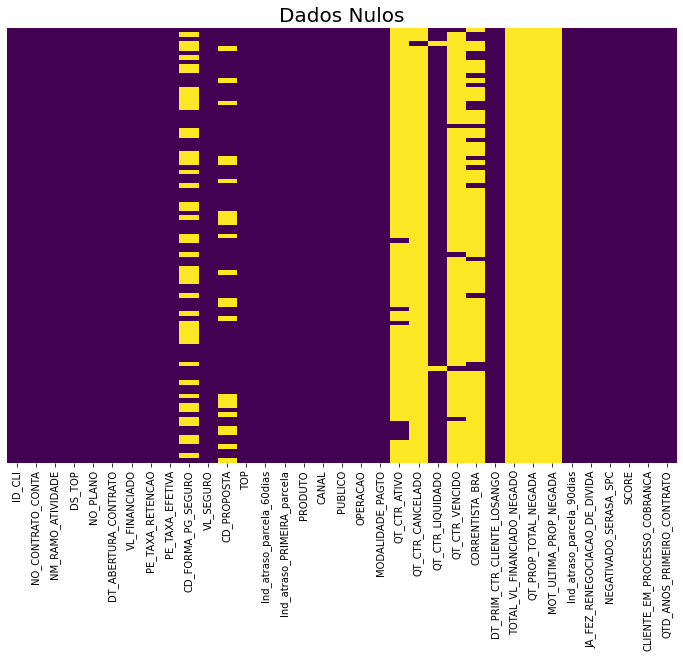

In [57]:
# Visualizando onde há Valores NaN na base de clientes
plt.figure(figsize=(12, 8))
sns.heatmap(df_clientes.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Dados Nulos", size=20)
plt.show()

In [58]:
df_clientes_sem_na = df_clientes.dropna(axis=1)

### Analisando as correlações entre as variáveis da base de Clientes

<AxesSubplot:>

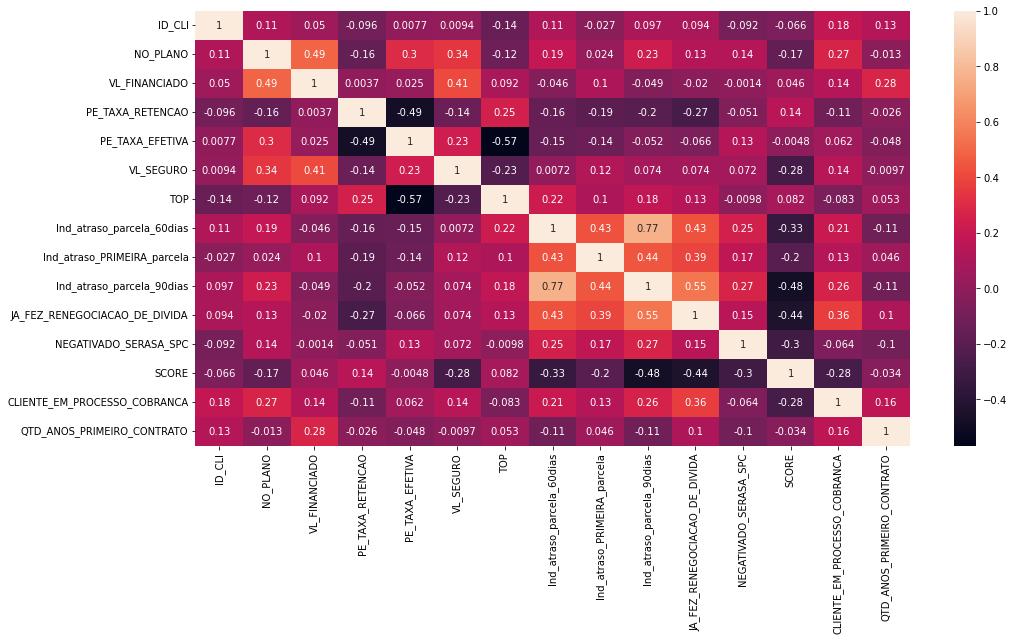

In [59]:
# Understanding the correlation between the variables of the df_clientes
plt.figure(figsize=(16, 8))
sns.heatmap(df_clientes_sem_na.corr(), annot=True)

In [60]:
# Função para mostrar os valores em cima das barras nos gráficos
def show_values(axs, orient="v", space=0.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height() * 0.01)
                value = "{:.1f}".format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height() * 0.5)
                value = "{:.1f}".format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

<br>

## Entendendo a distribuição da variável Score

Text(0, 0.5, 'Record count')

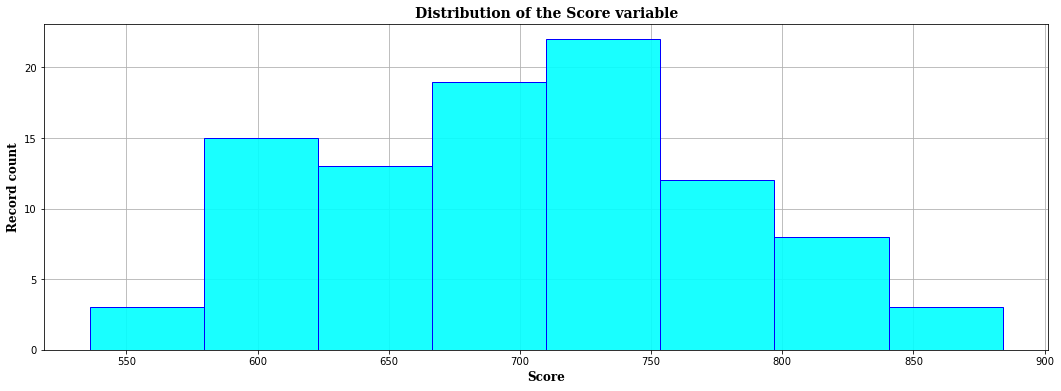

In [61]:
# Understanding the distribution of the Score variable
plt.figure(figsize=(18, 6))
sns.histplot(
    x="SCORE",
    data=df_clientes,
    color="#00FFFF",
    edgecolor="blue",
    linewidth=1,
    alpha=0.9,
    zorder=3,
)

plt.grid(True, zorder=0)

plt.title(
    "Distribution of the Score variable",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 14},
)
plt.xlabel(
    "Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 12},
)
plt.ylabel(
    "Record count",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 12},
)

<br>

## Criando uma faixa de Score

In [62]:
lista_faixa = []

for i in df_clientes["SCORE"]:
    if i <= 250:
        lista_faixa.append("0 - 250")

    elif i <= 500:
        lista_faixa.append("251 - 500")

    elif i <= 750:
        lista_faixa.append("501 - 750")

    elif i <= 1000:
        lista_faixa.append("751 - 1000")

df_clientes["SCORE_FAIXA"] = lista_faixa

In [63]:
df_clientes.head(10)[["SCORE", "SCORE_FAIXA"]]

,SCORE,SCORE_FAIXA
0,661,501 - 750
4,740,501 - 750
5,740,501 - 750
6,833,751 - 1000
8,676,501 - 750
13,725,501 - 750
15,822,751 - 1000
17,615,501 - 750
21,765,751 - 1000
24,609,501 - 750


<br>

## Faixas de Score (Distribuição estatística)

Text(0, 0.5, 'Score')

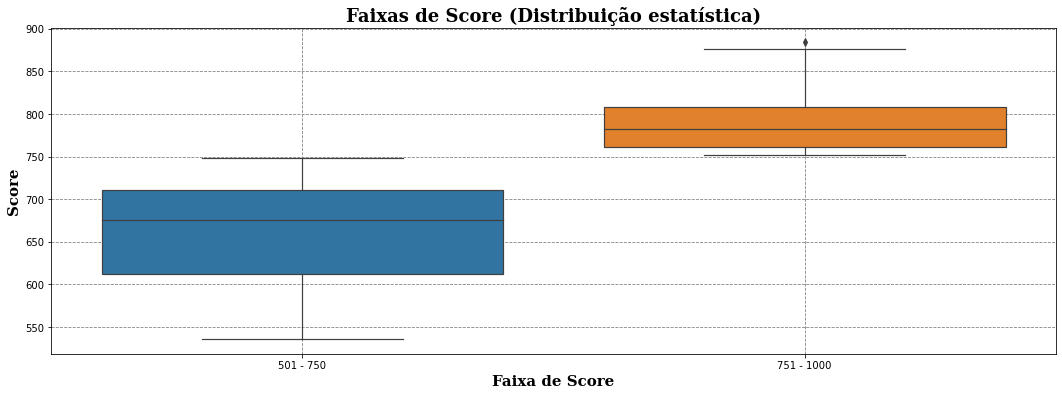

In [64]:
plt.figure(figsize=(18, 6))

ax = sns.boxplot(data=df_clientes, x="SCORE_FAIXA", y="SCORE", linewidth=1.2, zorder=3,)

ax.set_axisbelow(True)
ax.grid(color="gray", linestyle="dashed")

plt.title(
    "Faixas de Score (Distribuição estatística)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa de Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

<br>

## Faixa do Score por negativação no Serasa

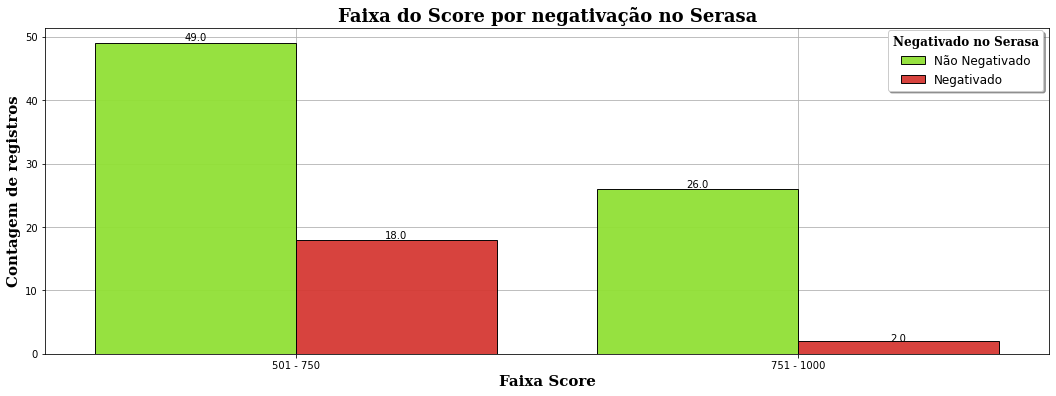

In [65]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="SCORE_FAIXA",
    hue="NEGATIVADO_SERASA_SPC",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes_sem_n_encontrado["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa do Score por negativação no Serasa",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Negativado no Serasa", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não Negativado")
L.get_texts()[1].set_text("Negativado")

show_values(ax)

<br>

## Score por Negativação Serasa (Distribuição estatística)

Text(0, 0.5, 'Score')

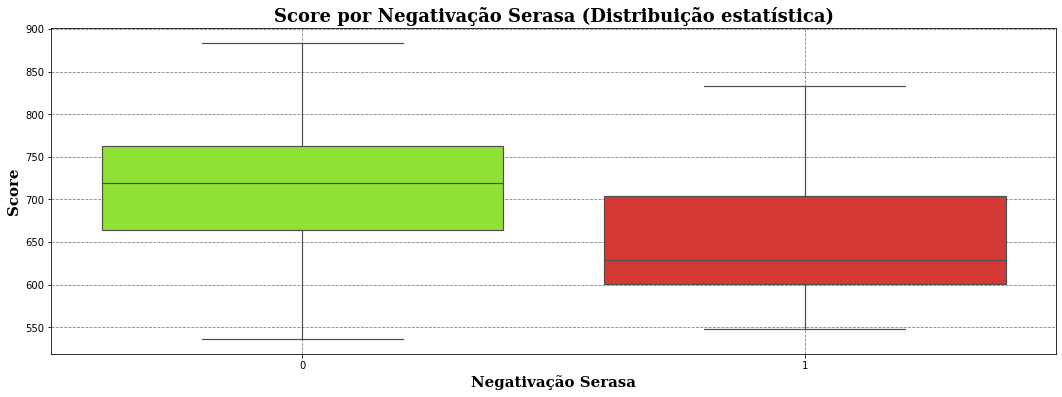

In [66]:
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df_clientes,
    x="NEGATIVADO_SERASA_SPC",
    y="SCORE",
    palette={0: "#93fd18", 1: "#f02018"},
    linewidth=1.2,
    zorder=3,
)

ax.set_axisbelow(True)
ax.grid(color="gray", linestyle="dashed")

plt.title(
    "Score por Negativação Serasa (Distribuição estatística)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Negativação Serasa",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

In [67]:
# Negativados no Serasa acima de 750 de Score
df_clientes[
    (df_clientes["SCORE"] > 750) & (df_clientes["NEGATIVADO_SERASA_SPC"] == 1)
].reset_index(drop=True)

,ID_CLI,NO_CONTRATO_CONTA,NM_RAMO_ATIVIDADE,DS_TOP,NO_PLANO,DT_ABERTURA_CONTRATO,VL_FINANCIADO,PE_TAXA_RETENCAO,PE_TAXA_EFETIVA,CD_FORMA_PG_SEGURO,VL_SEGURO,CD_PROPOSTA,TOP,Ind_atraso_parcela_60dias,Ind_atraso_PRIMEIRA_parcela,PRODUTO,CANAL,PUBLICO,OPERACAO,MODALIDADE_PAGTO,QT_CTR_ATIVO,QT_CTR_CANCELADO,QT_CTR_LIQUIDADO,QT_CTR_VENCIDO,CORRENTISTA_BRA,DT_PRIM_CTR_CLIENTE_LOSANGO,TOTAL_VL_FINANCIADO_NEGADO,QT_PROP_TOTAL_NEGADA,MOT_ULTIMA_PROP_NEGADA,Ind_atraso_parcela_90dias,JA_FEZ_RENEGOCIACAO_DE_DIVIDA,NEGATIVADO_SERASA_SPC,SCORE,CLIENTE_EM_PROCESSO_COBRANCA,QTD_ANOS_PRIMEIRO_CONTRATO,SCORE_FAIXA
0,22135318,030106000002431,NAO ENCONTRADA,EP ONLINE CARNE,24,2019-11-18,5213.60,0.00,13.99,NaN,0.00,P5278326185,74,1,0,EP,DIGITAL,PF,CARNE,COM JUROS,NaN,1.00,NaN,NaN,NaN,2019-11-18,NaN,NaN,NaN,1,0.00,1,833,0.00,2,751 - 1000
1,38201257,03020041396506K,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,10,2019-02-27,647.10,0.00,6.30,F,54.60,P2706009735,1,1,1,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,1.00,NaN,NaN,2019-02-27,NaN,NaN,NaN,1,0.00,1,752,0.00,3,751 - 1000


## Faixa do Score por atraso de primeira parcela

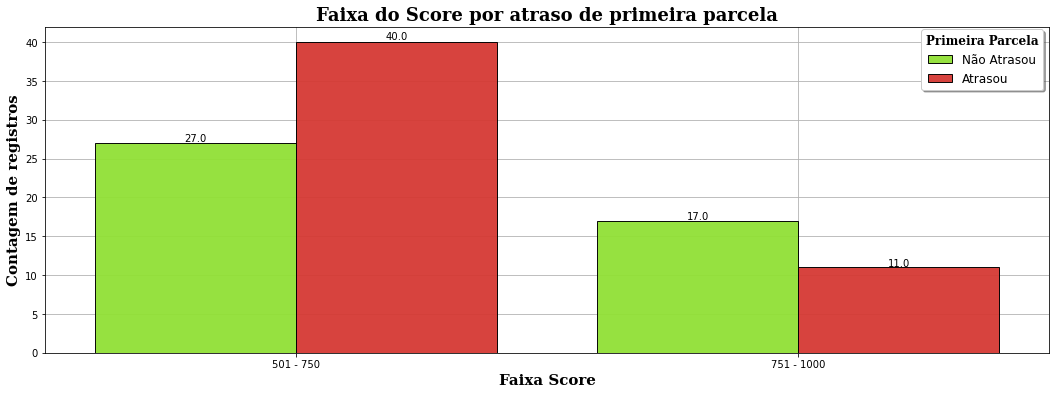

In [68]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="SCORE_FAIXA",
    hue="Ind_atraso_PRIMEIRA_parcela",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes_sem_n_encontrado["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa do Score por atraso de primeira parcela",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Primeira Parcela", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não Atrasou")
L.get_texts()[1].set_text("Atrasou")

show_values(ax)

<br>

## Faixa do Score por processo de cobrança

In [69]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

posx and posy should be finite values
posx and posy should be finite values


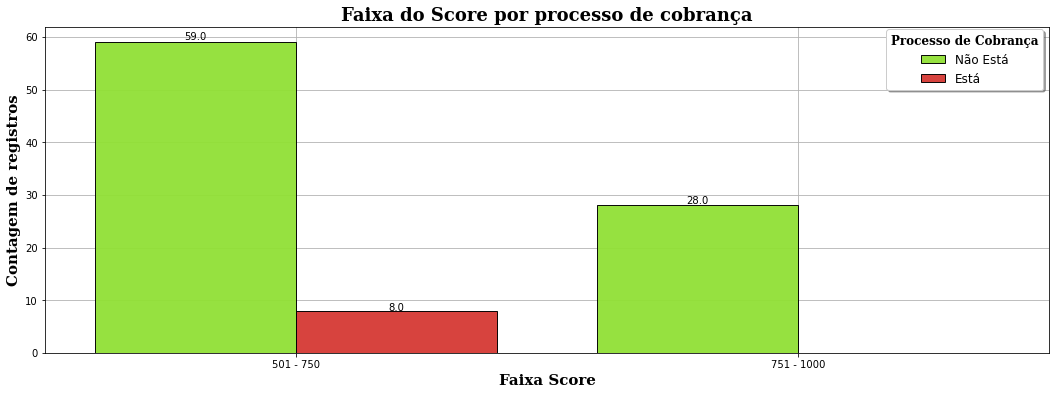

In [70]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="SCORE_FAIXA",
    hue="CLIENTE_EM_PROCESSO_COBRANCA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes_sem_n_encontrado["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa do Score por processo de cobrança",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Processo de Cobrança", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não Está")
L.get_texts()[1].set_text("Está")

show_values(ax)

<br>

## Atraso de parcela 60 dias + (Distribuição dos registros)

Quantidade de registros com atraso na parcela 60 dias + (Percentual):


0   58.95
1   41.05
Name: Ind_atraso_parcela_60dias, dtype: float64


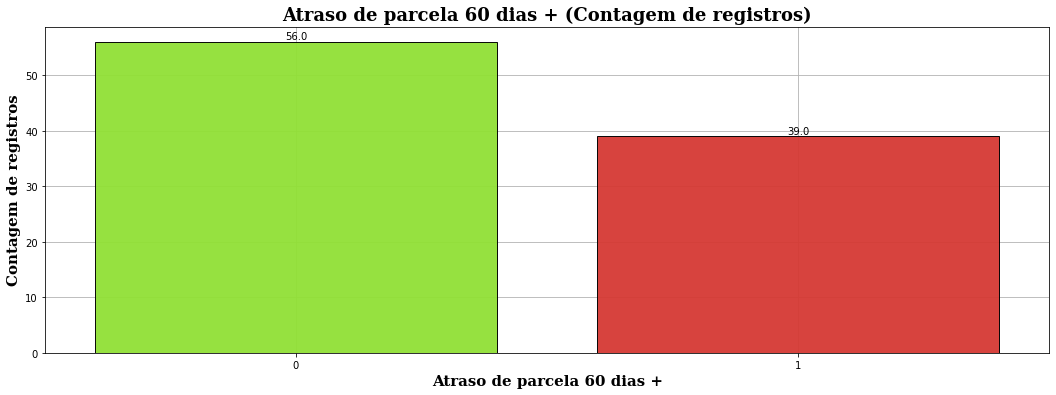

In [71]:
print(
    color.BOLD
    + "Quantidade de registros com atraso na parcela 60 dias + (Percentual):"
    + color.END
)
print("\n")
print(df_clientes["Ind_atraso_parcela_60dias"].value_counts(normalize=True) * 100)

plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="Ind_atraso_parcela_60dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=df_clientes["Ind_atraso_parcela_60dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso de parcela 60 dias + (Contagem de registros)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Atraso de parcela 60 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

show_values(ax)

<br>

## Faixa de Score por atraso de parcela 60 dias +

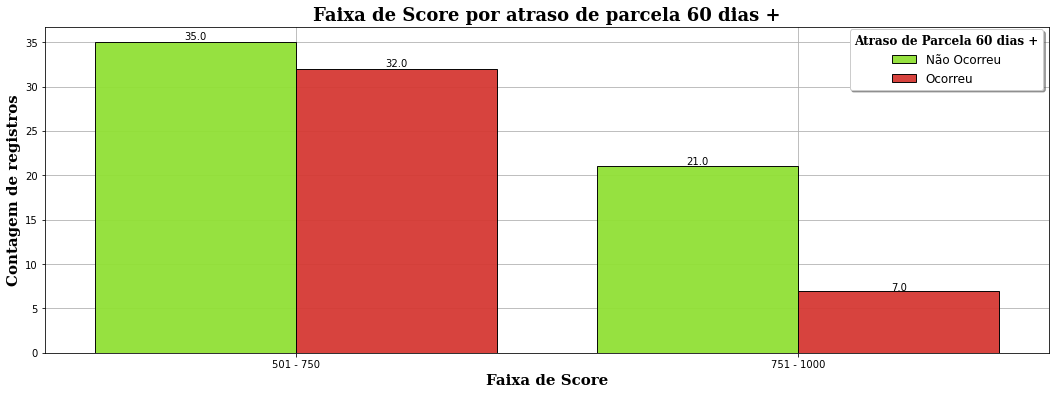

In [72]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="SCORE_FAIXA",
    hue="Ind_atraso_parcela_60dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes["Ind_atraso_parcela_60dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa de Score por atraso de parcela 60 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa de Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Atraso de Parcela 60 dias +",
    prop={"size": 12, "family": "serif", "weight": "bold"},
)
L.get_texts()[0].set_text("Não Ocorreu")
L.get_texts()[1].set_text("Ocorreu")

show_values(ax)

<br>

## Atraso da primeira parcela por atraso de parcela 60 dias +

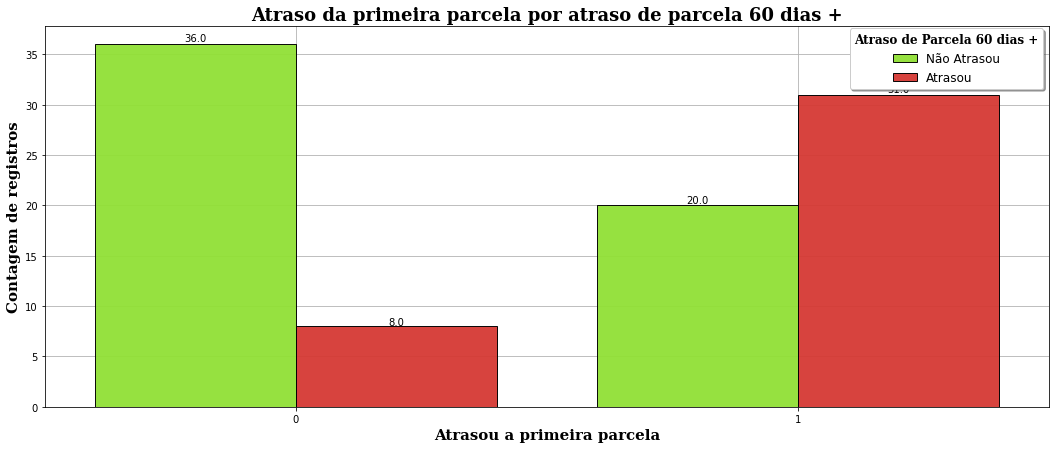

In [73]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df_clientes,
    x="Ind_atraso_PRIMEIRA_parcela",
    hue="Ind_atraso_parcela_60dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes["Ind_atraso_parcela_60dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso da primeira parcela por atraso de parcela 60 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Atrasou a primeira parcela",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Atraso de Parcela 60 dias +",
    prop={"size": 12, "family": "serif", "weight": "bold"},
)
L.get_texts()[0].set_text("Não Atrasou")
L.get_texts()[1].set_text("Atrasou")

show_values(ax)

<br>

## Ramo do negócio por atraso de parcela 60 dias +

posx and posy should be finite values
posx and posy should be finite values


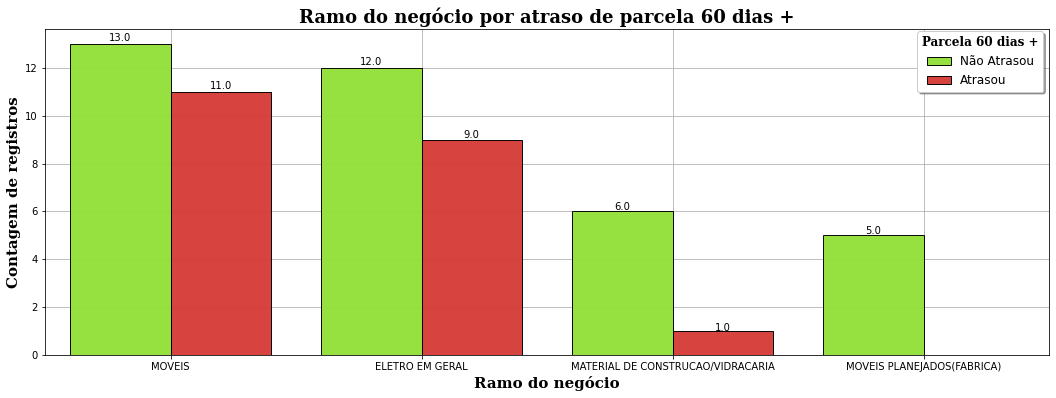

In [74]:
df_clientes_sem_n = df_clientes[df_clientes["NM_RAMO_ATIVIDADE"] != "NAO ENCONTRADA"]

plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes_sem_n,
    x="NM_RAMO_ATIVIDADE",
    hue="Ind_atraso_parcela_60dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=df_clientes_sem_n["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Ramo do negócio por atraso de parcela 60 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Ramo do negócio",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Parcela 60 dias +", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não Atrasou")
L.get_texts()[1].set_text("Atrasou")

show_values(ax)

<br>

## Atraso de parcela 60 dias + por renegociação de dívida

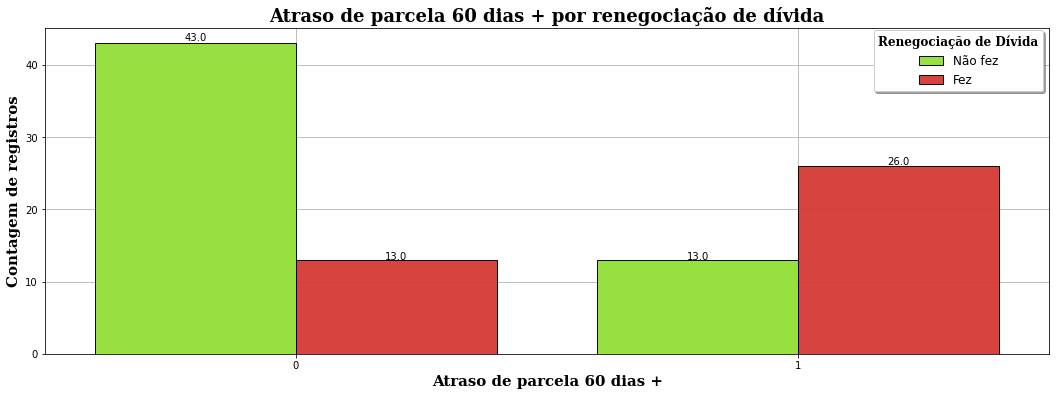

In [75]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="Ind_atraso_parcela_60dias",
    hue="JA_FEZ_RENEGOCIACAO_DE_DIVIDA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=df_clientes["Ind_atraso_parcela_60dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso de parcela 60 dias + por renegociação de dívida",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Atraso de parcela 60 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Renegociação de Dívida", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não fez")
L.get_texts()[1].set_text("Fez")

show_values(ax)

<br>

## Atraso de parcela 90 dias + (Distribuição dos registros)

Quantidade de registros com atraso na parcela 90 dias + (Percentual):


0   55.79
1   44.21
Name: Ind_atraso_parcela_90dias, dtype: float64


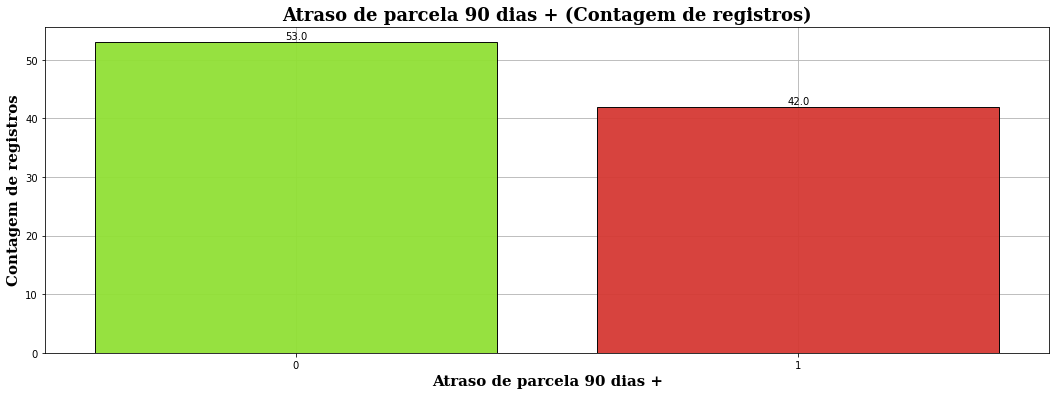

In [76]:
print(
    color.BOLD
    + "Quantidade de registros com atraso na parcela 90 dias + (Percentual):"
    + color.END
)
print("\n")
print(df_clientes["Ind_atraso_parcela_90dias"].value_counts(normalize=True) * 100)

plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="Ind_atraso_parcela_90dias",
    # color="#33FF33",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=df_clientes["Ind_atraso_parcela_90dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso de parcela 90 dias + (Contagem de registros)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Atraso de parcela 90 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

show_values(ax)

<br>

## Faixa de Score por atraso de parcela 90 dias +

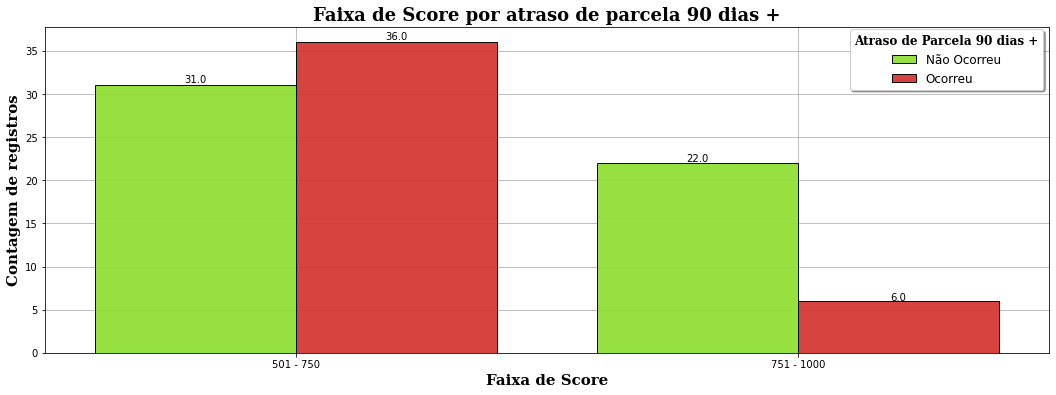

In [77]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="SCORE_FAIXA",
    hue="Ind_atraso_parcela_90dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes["Ind_atraso_parcela_60dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa de Score por atraso de parcela 90 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa de Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Atraso de Parcela 90 dias +",
    prop={"size": 12, "family": "serif", "weight": "bold"},
)
L.get_texts()[0].set_text("Não Ocorreu")
L.get_texts()[1].set_text("Ocorreu")

show_values(ax)

<br>

## Atraso da primeira parcela por atraso de parcela 90 dias +

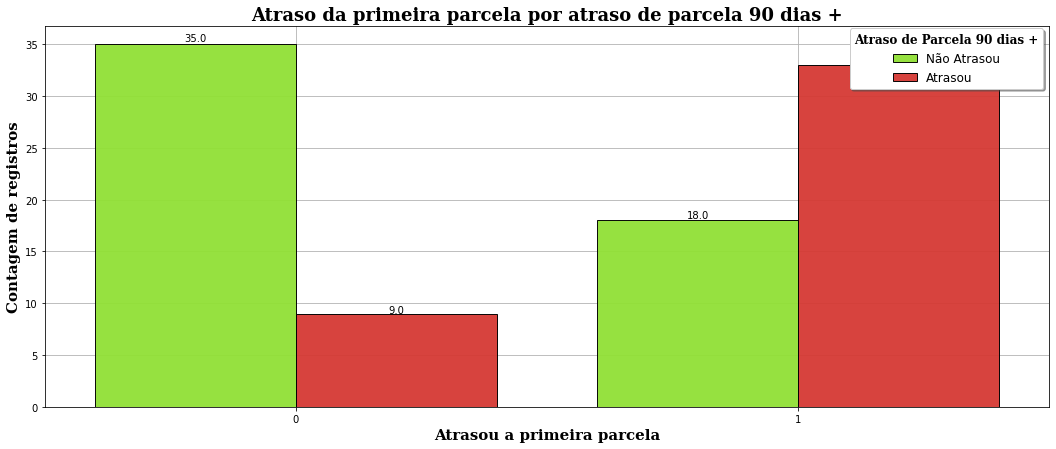

In [78]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df_clientes,
    x="Ind_atraso_PRIMEIRA_parcela",
    hue="Ind_atraso_parcela_90dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes["Ind_atraso_parcela_60dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso da primeira parcela por atraso de parcela 90 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Atrasou a primeira parcela",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Atraso de Parcela 90 dias +",
    prop={"size": 12, "family": "serif", "weight": "bold"},
)
L.get_texts()[0].set_text("Não Atrasou")
L.get_texts()[1].set_text("Atrasou")

show_values(ax)

<br>

## Ramo do negócio por atraso de parcela 90 dias +

posx and posy should be finite values
posx and posy should be finite values


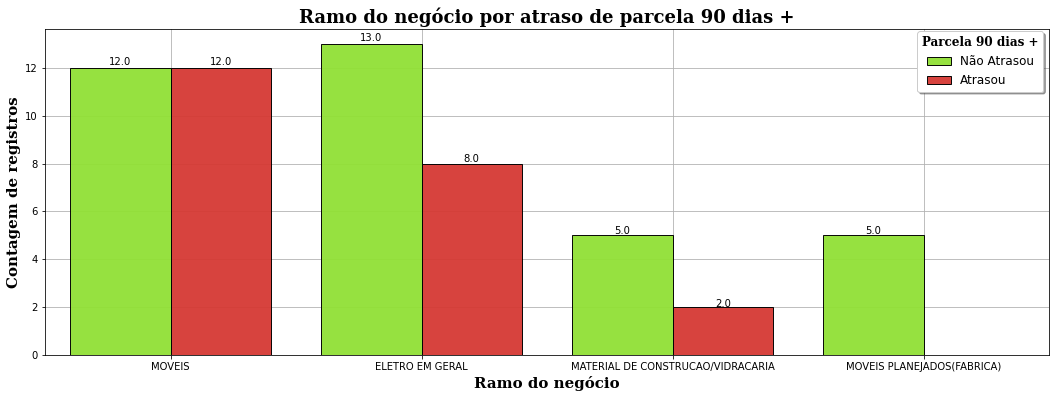

In [79]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes_sem_n,
    x="NM_RAMO_ATIVIDADE",
    hue="Ind_atraso_parcela_90dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=df_clientes_sem_n["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Ramo do negócio por atraso de parcela 90 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Ramo do negócio",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Parcela 90 dias +", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não Atrasou")
L.get_texts()[1].set_text("Atrasou")

show_values(ax)

<br>

## Atraso de parcela 90 dias + por renegociação de dívida

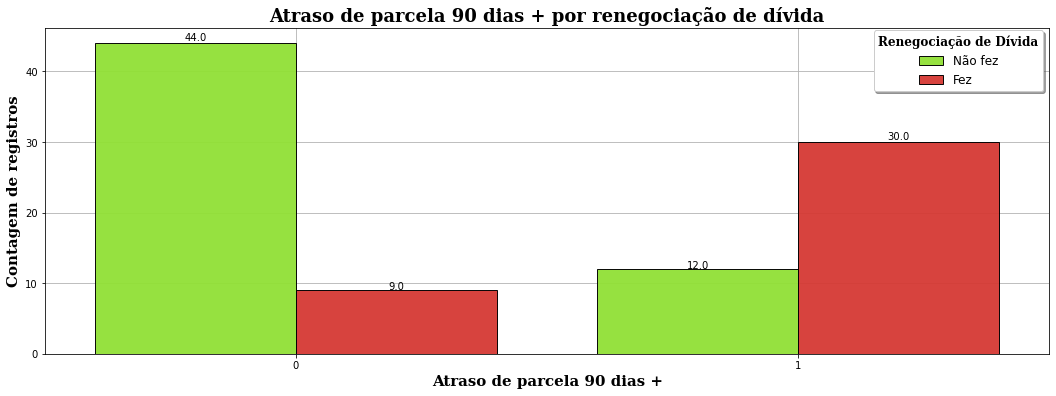

In [80]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="Ind_atraso_parcela_90dias",
    hue="JA_FEZ_RENEGOCIACAO_DE_DIVIDA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=df_clientes["Ind_atraso_parcela_90dias"].value_counts().index,
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso de parcela 90 dias + por renegociação de dívida",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Atraso de parcela 90 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Renegociação de Dívida", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não fez")
L.get_texts()[1].set_text("Fez")

show_values(ax)

<br>

## Ordenando valores para os gráficos de quantia de anos

In [81]:
result = (
    df_clientes.groupby(["QTD_ANOS_PRIMEIRO_CONTRATO"])["ID_CLI"]
    .count()
    .reset_index()
    .sort_values("QTD_ANOS_PRIMEIRO_CONTRATO")
)
result.head()

,QTD_ANOS_PRIMEIRO_CONTRATO,ID_CLI
0,2,30
1,3,11
2,4,2
3,5,6
4,6,4


<br>

## Entendendo a distribuição da quantidade de anos de parceria do cliente com a Losango

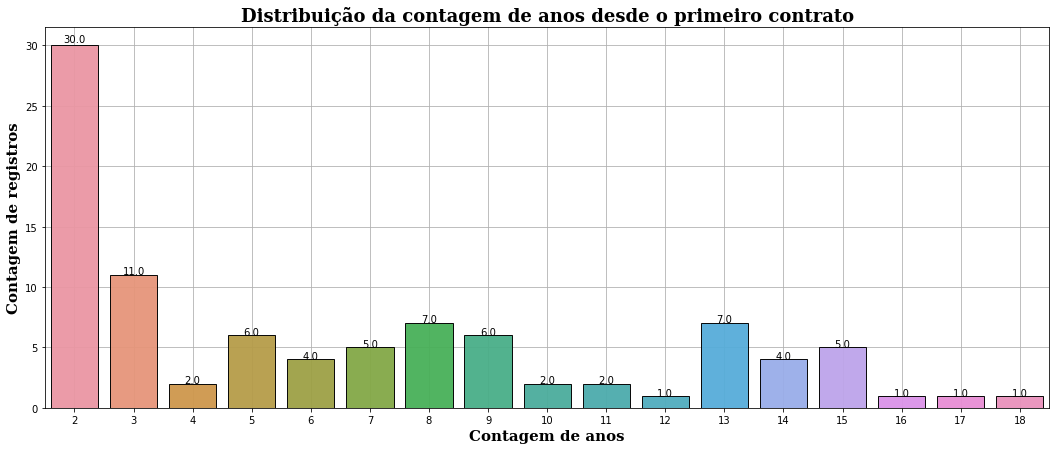

In [82]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df_clientes,
    x="QTD_ANOS_PRIMEIRO_CONTRATO",
    # palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Distribuição da contagem de anos desde o primeiro contrato",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Contagem de anos",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

show_values(ax)

<br>

## Quantidade de anos de parceria por negativação no Serasa

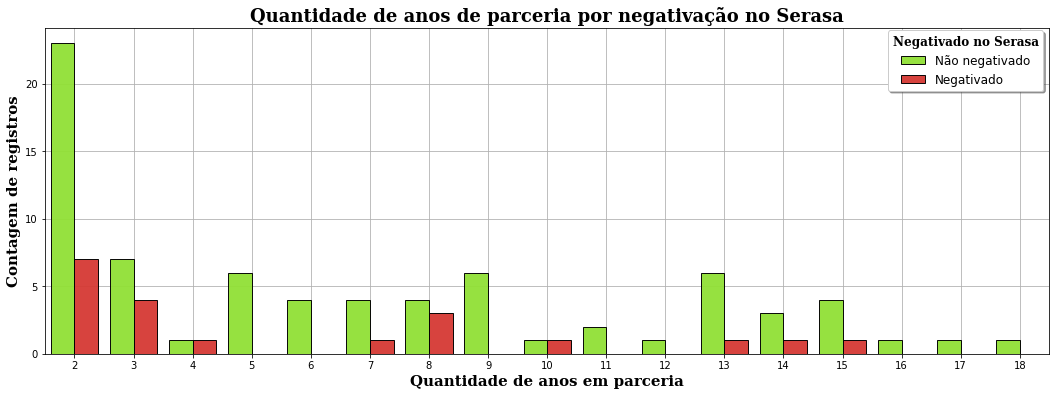

In [83]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_clientes,
    x="QTD_ANOS_PRIMEIRO_CONTRATO",
    hue="NEGATIVADO_SERASA_SPC",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Quantidade de anos de parceria por negativação no Serasa",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Quantidade de anos em parceria",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Negativado no Serasa", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não negativado")
L.get_texts()[1].set_text("Negativado")

## Gráfico pronto para quando receber uma amostragem maior

<br>

## Contagem de anos desde o primeiro contrato por processo de cobrança

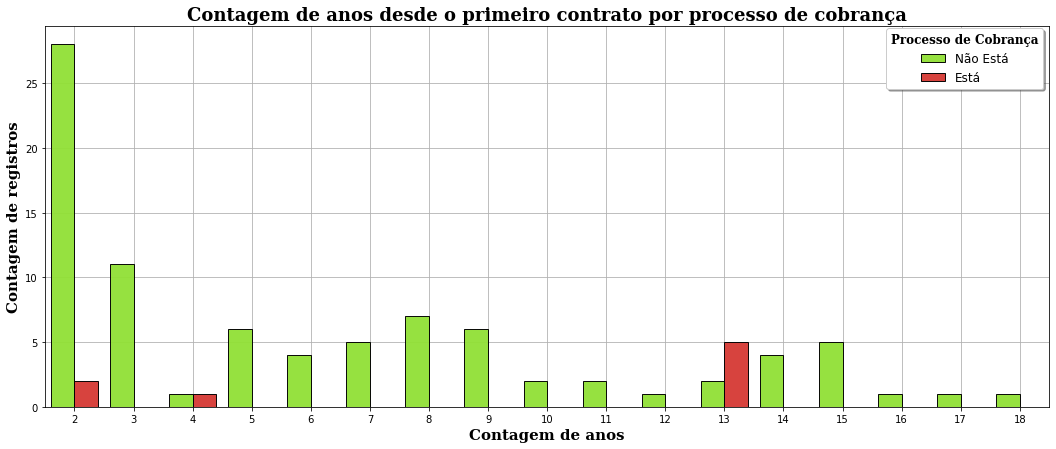

In [84]:
# Colocar cliente em processo de cobrança

plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df_clientes,
    x="QTD_ANOS_PRIMEIRO_CONTRATO",
    hue="CLIENTE_EM_PROCESSO_COBRANCA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Contagem de anos desde o primeiro contrato por processo de cobrança",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Contagem de anos",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Processo de Cobrança", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não Está")
L.get_texts()[1].set_text("Está")

# show_values(ax)

<br>

## Renegociação de dívida por primeira parcela

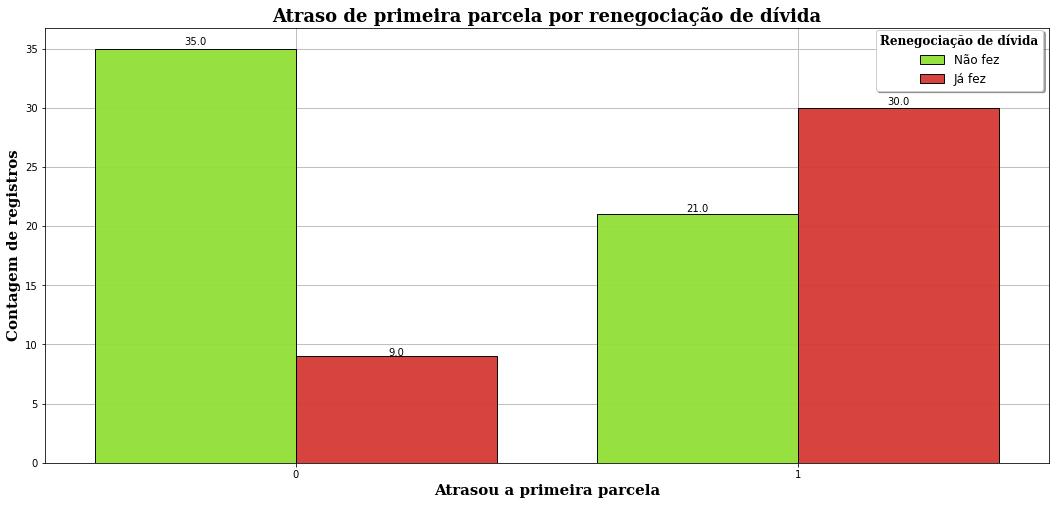

In [85]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df_clientes,
    x="Ind_atraso_PRIMEIRA_parcela",
    hue="JA_FEZ_RENEGOCIACAO_DE_DIVIDA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso de primeira parcela por renegociação de dívida",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Atrasou a primeira parcela",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Renegociação de dívida", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não fez")
L.get_texts()[1].set_text("Já fez")

show_values(ax)

<br>
<br>
Base Clientes
<br>
<br>
<hr>
<br>
Base CRM
<br>
<br>

In [86]:
# Base de campanhas CRM efetuadas no mês de Fevereiro/2022.
df_crm = pd.read_csv(
    r"../Bases/Amostragens_Iniciais/DATA_REQUEST_DDS_CRM_VISAO_CRM.csv", delimiter=","
)

df_crm.head()

,IN_TIPO_PESSOA,ID_CLI,CANAL,PRODUTO_OFERECIDO,PRODUTO_INTERACAO_CONTRATADO,IN_INTERACAO_CAMPANHA,IN_CONTRATOU,IN_ULTIMA_CAMPANHA
0,F,48039798,SMS,CDC/EP,NaN,0,0,1
1,F,56272892,SMS,CDC/EP,NaN,0,0,1
2,F,71075924,SMS,EP,EP,1,0,1
3,F,5755489,SMS,EP,NaN,0,0,1
4,F,57091098,SMS,CDC,NaN,0,0,1


In [87]:
df_crm["CANAL"].value_counts()

SMS          92
TLMKT+SMS     8
Name: CANAL, dtype: int64

In [88]:
df_crm["IN_CONTRATOU"].value_counts()

0    100
Name: IN_CONTRATOU, dtype: int64

In [89]:
df_crm["PRODUTO_OFERECIDO"].value_counts()

EP        68
CDC       27
CDC/EP     5
Name: PRODUTO_OFERECIDO, dtype: int64

In [90]:
df_crm["IN_INTERACAO_CAMPANHA"].value_counts()

0    88
1    12
Name: IN_INTERACAO_CAMPANHA, dtype: int64

In [91]:
df_crm["IN_CONTRATOU"].value_counts()

0    100
Name: IN_CONTRATOU, dtype: int64

In [92]:
print("Sumário estatístico da base de CRM:")
df_crm.describe()

Sumário estatístico da base de CRM:


,ID_CLI,IN_INTERACAO_CAMPANHA,IN_CONTRATOU,IN_ULTIMA_CAMPANHA
count,100.00,100.00,100.00,100.00
mean,50161887.41,0.12,0.00,1.00
std,23299231.84,0.33,0.00,0.00
min,5755489.00,0.00,0.00,1.00
25%,27362471.00,0.00,0.00,1.00
50%,56251741.50,0.00,0.00,1.00
75%,71073313.25,0.00,0.00,1.00
max,72956885.00,1.00,0.00,1.00


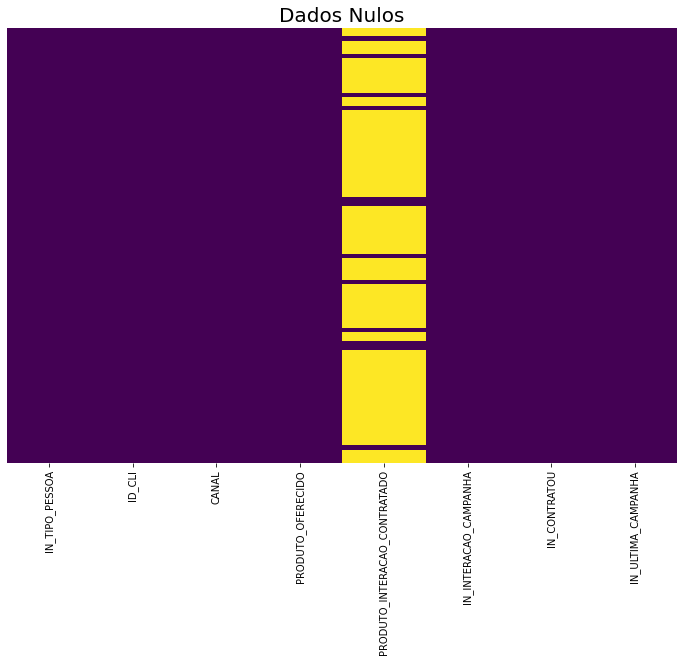

In [93]:
# Visualizando onde há Valores NaN na base de CRM
plt.figure(figsize=(12, 8))
sns.heatmap(df_crm.isnull(), yticklabels=False, cbar=False, cmap="viridis")
plt.title("Dados Nulos", size=20)
plt.show()

<br>

## Canal de contato por interação na campanha

posx and posy should be finite values
posx and posy should be finite values


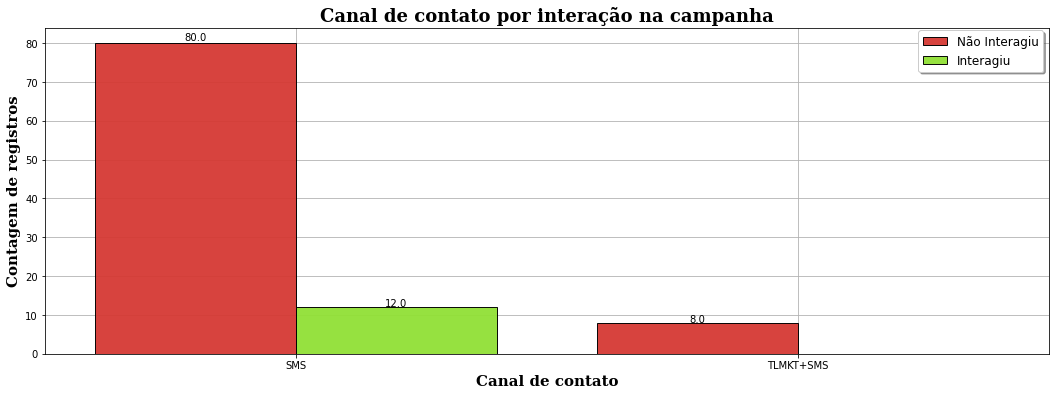

In [94]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_crm,
    x="CANAL",
    hue="IN_INTERACAO_CAMPANHA",
    palette={0: "#f02018", 1: "#93fd18"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes_sem_n_encontrado["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Canal de contato por interação na campanha",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Canal de contato",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)

L.get_texts()[0].set_text("Não Interagiu")
L.get_texts()[1].set_text("Interagiu")

show_values(ax)

<br>

## Se houve ou não contratação do produto oferecido

In [95]:
df_crm["IN_CONTRATOU"].value_counts()

0    100
Name: IN_CONTRATOU, dtype: int64

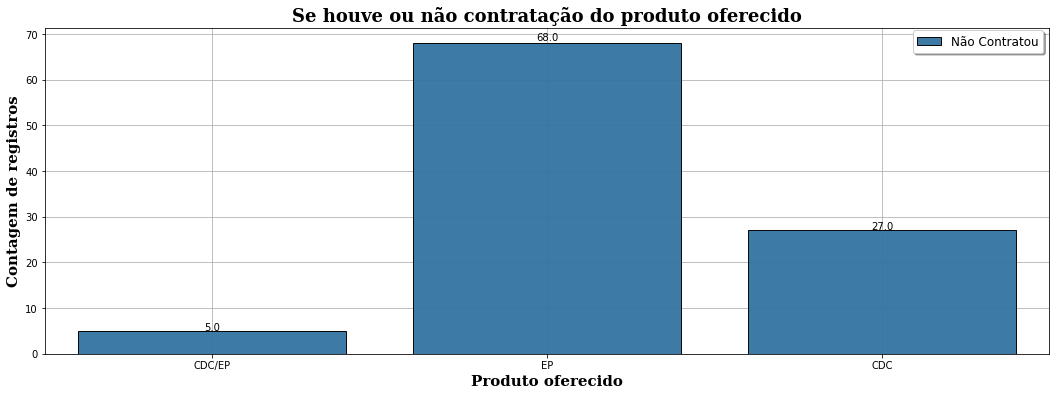

In [96]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_crm,
    x="PRODUTO_OFERECIDO",
    hue="IN_CONTRATOU",
    # palette={0: "#f02018", 1: "#93fd18"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes_sem_n_encontrado["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Se houve ou não contratação do produto oferecido",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Produto oferecido",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)

L.get_texts()[0].set_text("Não Contratou")
# L.get_texts()[1].set_text("Interagiu")

show_values(ax)

<br>

### Interação da campanha por contrato de produto

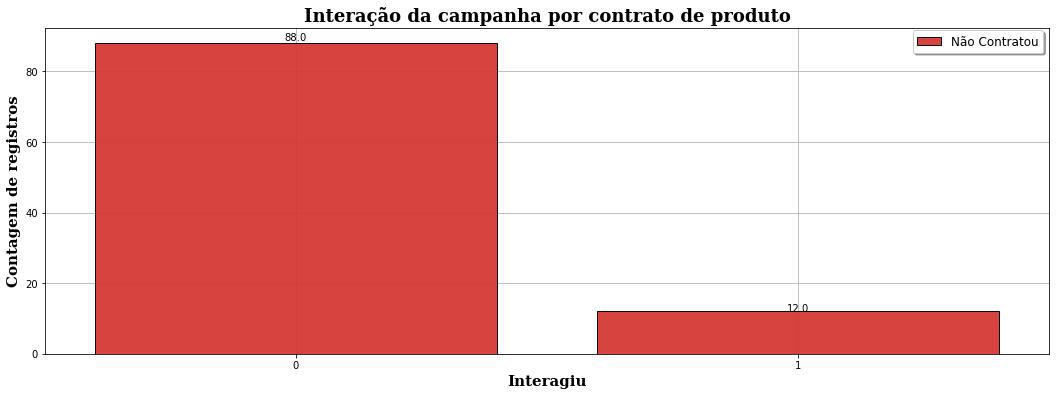

In [97]:
plt.figure(figsize=(18, 6))

ax = sns.countplot(
    data=df_crm,
    x="IN_INTERACAO_CAMPANHA",
    hue="IN_CONTRATOU",
    palette={0: "#f02018", 1: "#93fd18"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=df_clientes_sem_n_encontrado["NM_RAMO_ATIVIDADE"].value_counts().index[0:4],
)

plt.grid(True, zorder=0)

plt.title(
    "Interação da campanha por contrato de produto",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Interagiu",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)

L.get_texts()[0].set_text("Não Contratou")
# L.get_texts()[1].set_text("Contratou")

show_values(ax)

<br>
<hr>
<br>

In [98]:
# Base de infos de clientes.
df_infos_clientes = pd.read_csv(
    r"../Bases/Amostragens_Iniciais/DATA_REQUEST_DDS_CRM_VISAO_SDC.csv",
    encoding="ISO-8859-1",
)

print(df_infos_clientes.shape)
df_infos_clientes.head()

(100, 12)


,IN_TIPO_PESSOA,ID_CLI,FX_IDADE,GENERO,CEP_RESIDENCIA,CEP_TRABALHO,ESCOLARIDADE,PROFISSAO,ESTADO_CIVIL,RENDA,IN_EMAIL,IN_TELEFONE
0,F,59018857,36 A 40,FEMININO,79490000,79490000.00,Sem resposta,ASSALARIADO COM CART,Casado,"997,92",S,S
1,F,6095413,41 A 50,FEMININO,72125140,72125140.00,Sem resposta,AUTONOMA,Solteiro,"799,95",N,S
2,F,7423830,41 A 50,MASCULINO,44100000,0.00,Sem resposta,AUX OPERADOR,Solteiro,"189,75",N,S
3,F,36170182,41 A 50,MASCULINO,47850000,47850000.00,Sem resposta,ASSALARIADO COM CART,Solteiro,"1.583,95",S,S
4,F,68480981,51 A 60,MASCULINO,24000000,24722070.00,Sem resposta,ASSALARIADO COM CART,Outros,"0,00",N,S


<hr>

## Merging Clientes e Infos

In [99]:
df = df_clientes.merge(df_infos_clientes, on=["ID_CLI"])

In [100]:
print(df.shape)
df.head()

(17, 47)


,ID_CLI,NO_CONTRATO_CONTA,NM_RAMO_ATIVIDADE,DS_TOP,NO_PLANO,DT_ABERTURA_CONTRATO,VL_FINANCIADO,PE_TAXA_RETENCAO,PE_TAXA_EFETIVA,CD_FORMA_PG_SEGURO,VL_SEGURO,CD_PROPOSTA,TOP,Ind_atraso_parcela_60dias,Ind_atraso_PRIMEIRA_parcela,PRODUTO,CANAL,PUBLICO,OPERACAO,MODALIDADE_PAGTO,QT_CTR_ATIVO,QT_CTR_CANCELADO,QT_CTR_LIQUIDADO,QT_CTR_VENCIDO,CORRENTISTA_BRA,DT_PRIM_CTR_CLIENTE_LOSANGO,TOTAL_VL_FINANCIADO_NEGADO,QT_PROP_TOTAL_NEGADA,MOT_ULTIMA_PROP_NEGADA,Ind_atraso_parcela_90dias,JA_FEZ_RENEGOCIACAO_DE_DIVIDA,NEGATIVADO_SERASA_SPC,SCORE,CLIENTE_EM_PROCESSO_COBRANCA,QTD_ANOS_PRIMEIRO_CONTRATO,SCORE_FAIXA,IN_TIPO_PESSOA,FX_IDADE,GENERO,CEP_RESIDENCIA,CEP_TRABALHO,ESCOLARIDADE,PROFISSAO,ESTADO_CIVIL,RENDA,IN_EMAIL,IN_TELEFONE
0,59018857,030200223343556,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,12,2019-12-06,1650.00,0.00,6.20,F,214.19,P2730701919,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,3.00,1.00,NaN,2009-03-14,NaN,NaN,NaN,1,1.00,0,661,1.00,13,501 - 750,F,36 A 40,FEMININO,79490000,79490000.00,Sem resposta,ASSALARIADO COM CART,Casado,"997,92",S,S
1,68211264,03020099164031L,NAO ENCONTRADA,CREDITO LOJISTA SEM ALIENACAO,12,2019-04-22,1580.21,0.00,5.99,NaN,0.00,P2717851972,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,5.00,NaN,NaN,2019-04-22,NaN,NaN,NaN,0,1.00,1,609,0.00,2,501 - 750,F,51 A 60,FEMININO,60875776,0.00,Sem resposta,OUTROS,Outros,"2.755,99",S,S
2,8037277,030201255084087,ELETRO EM GERAL,CREDITO PESSOAL,18,2019-07-24,5000.00,0.00,8.79,F,1115.25,P2740850475,5,0,1,EP,FISICO,PF,CARNE,COM JUROS,NaN,NaN,2.00,1.00,1.00,2018-03-14,NaN,NaN,NaN,0,1.00,1,548,1.00,4,501 - 750,F,31 A 35,FEMININO,69980000,69980000.00,Sem resposta,ASSALARIADO COM CART,Casado,"1.044,85",S,S
3,23966385,030201255068782,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,6,2019-07-15,901.00,0.00,7.70,F,80.56,P2738493637,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,5.00,NaN,NaN,2019-07-15,NaN,NaN,NaN,1,1.00,1,591,0.00,2,501 - 750,F,36 A 40,MASCULINO,69017058,69088276.00,Sem resposta,TRABALHADOR INFORMAL,Outros,"1.099,99",S,S
4,23966385,03020125507037A,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,6,2019-07-15,502.00,0.00,7.70,F,23.87,P2738669296,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,5.00,NaN,NaN,2019-07-15,NaN,NaN,NaN,1,1.00,1,591,0.00,2,501 - 750,F,36 A 40,MASCULINO,69017058,69088276.00,Sem resposta,TRABALHADOR INFORMAL,Outros,"1.099,99",S,S


In [101]:
df_sem_na = df.dropna(axis=1)

<AxesSubplot:>

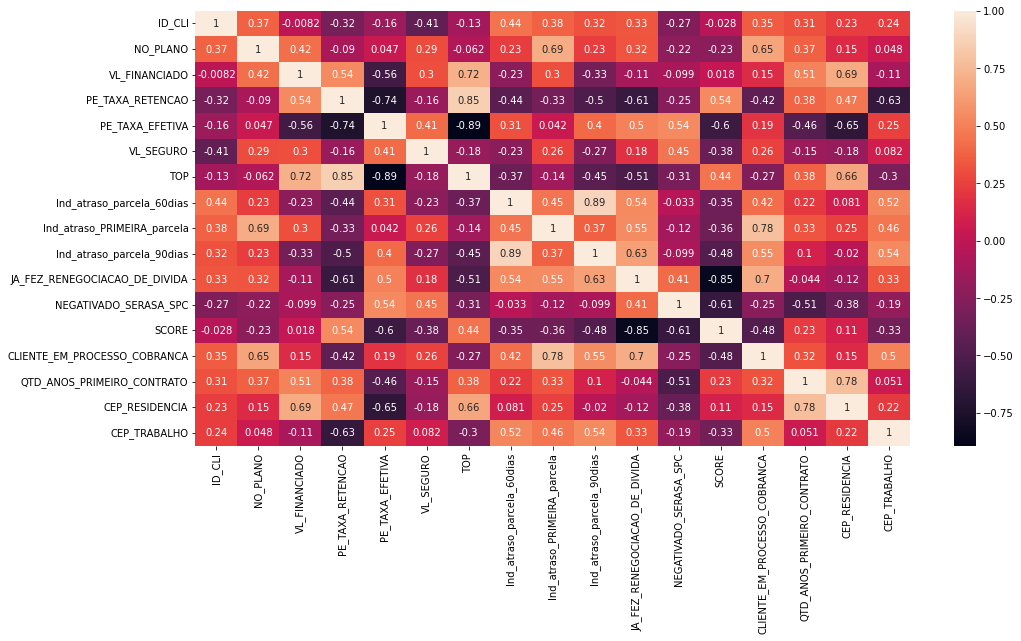

In [102]:
# Understanding the correlation between the variables of the df_clientes
plt.figure(figsize=(16, 8))
sns.heatmap(df_sem_na.corr(), annot=True)

<br>

# Variáveis por Gênero do cliente

<br>

## Fez renegociação de dívida por gênero do cliente

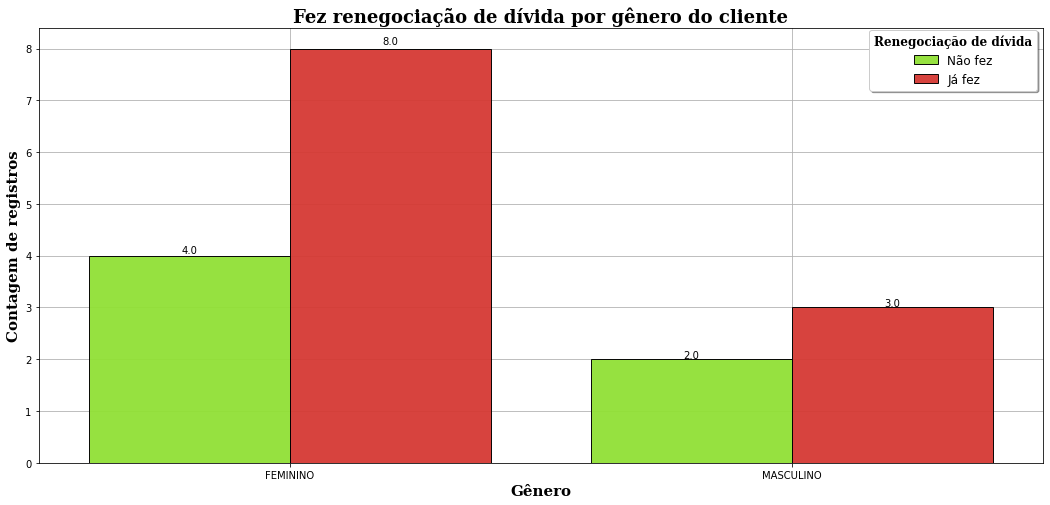

In [103]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df,
    x="GENERO",
    hue="JA_FEZ_RENEGOCIACAO_DE_DIVIDA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Fez renegociação de dívida por gênero do cliente",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Gênero",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Renegociação de dívida", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não fez")
L.get_texts()[1].set_text("Já fez")

show_values(ax)

<br>

## Atraso de parcela 60 dias + por gênero do cliente

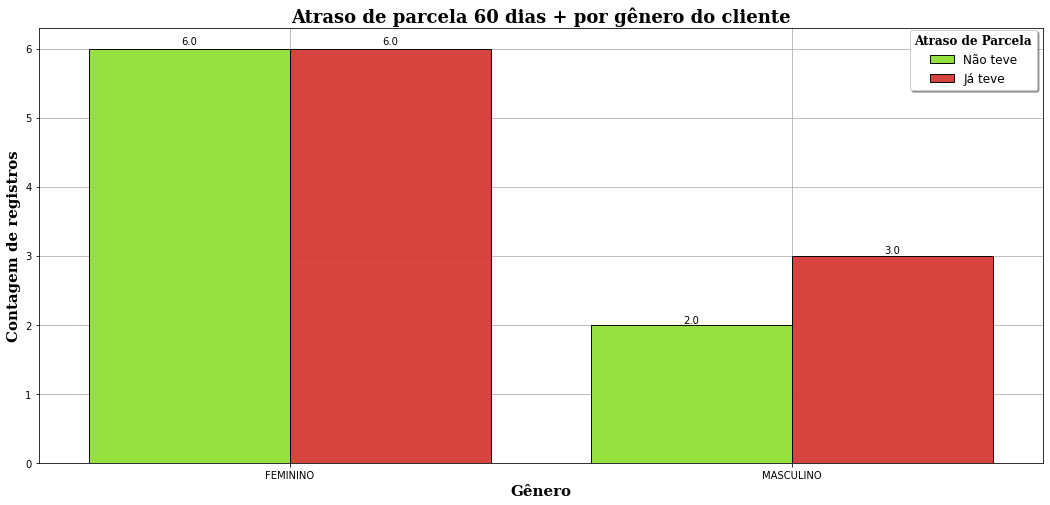

In [104]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df,
    x="GENERO",
    hue="Ind_atraso_parcela_60dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso de parcela 60 dias + por gênero do cliente",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Gênero",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Atraso de Parcela", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não teve")
L.get_texts()[1].set_text("Já teve")

show_values(ax)

<br>

## Atraso de parcela 90 dias + por gênero do cliente

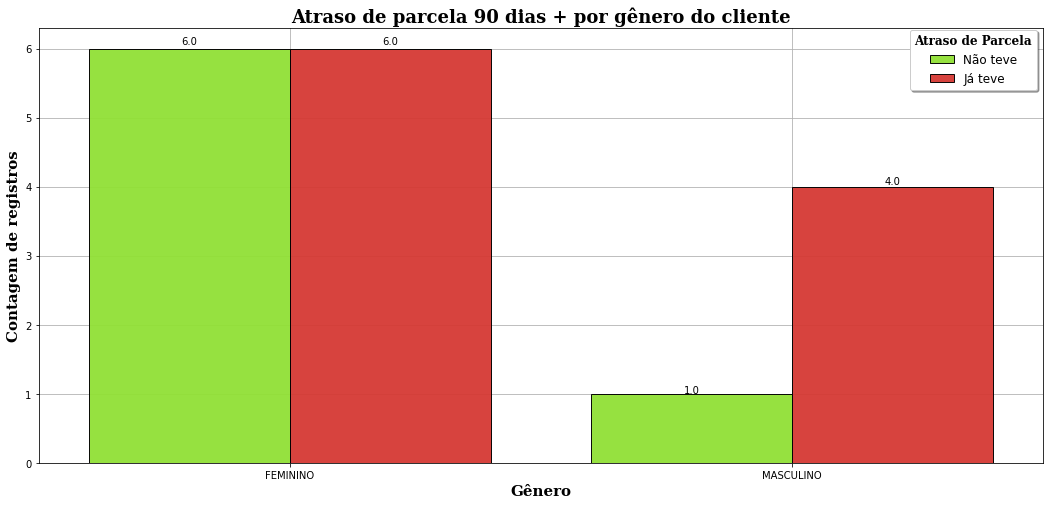

In [105]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df,
    x="GENERO",
    hue="Ind_atraso_parcela_90dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Atraso de parcela 90 dias + por gênero do cliente",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Gênero",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Atraso de Parcela", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não teve")
L.get_texts()[1].set_text("Já teve")

show_values(ax)

<br>

## Se está negativado no Serasa por gênero do cliente

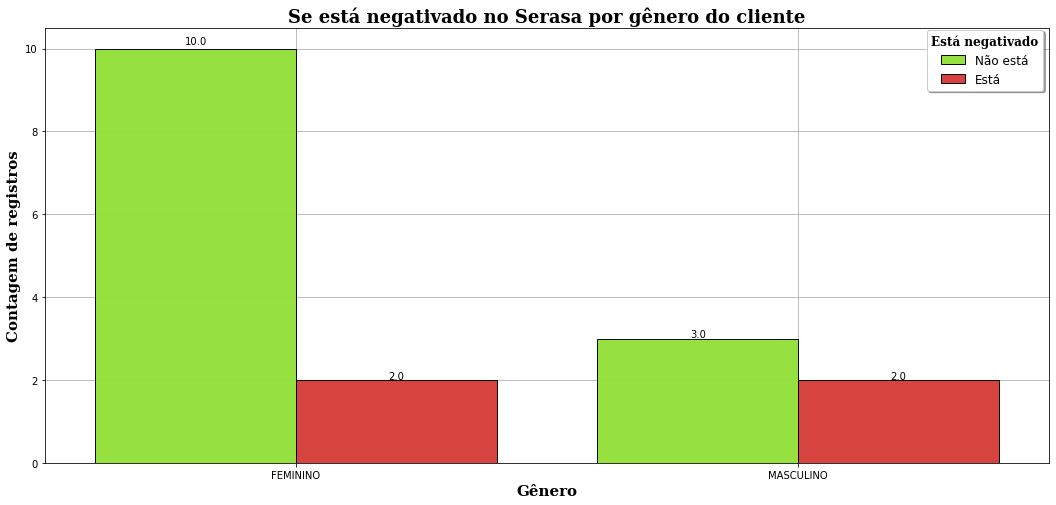

In [106]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df,
    x="GENERO",
    hue="NEGATIVADO_SERASA_SPC",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Se está negativado no Serasa por gênero do cliente",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Gênero",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Está negativado", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não está")
L.get_texts()[1].set_text("Está")

show_values(ax)

<br>

## Faixa do Score por gênero do cliente

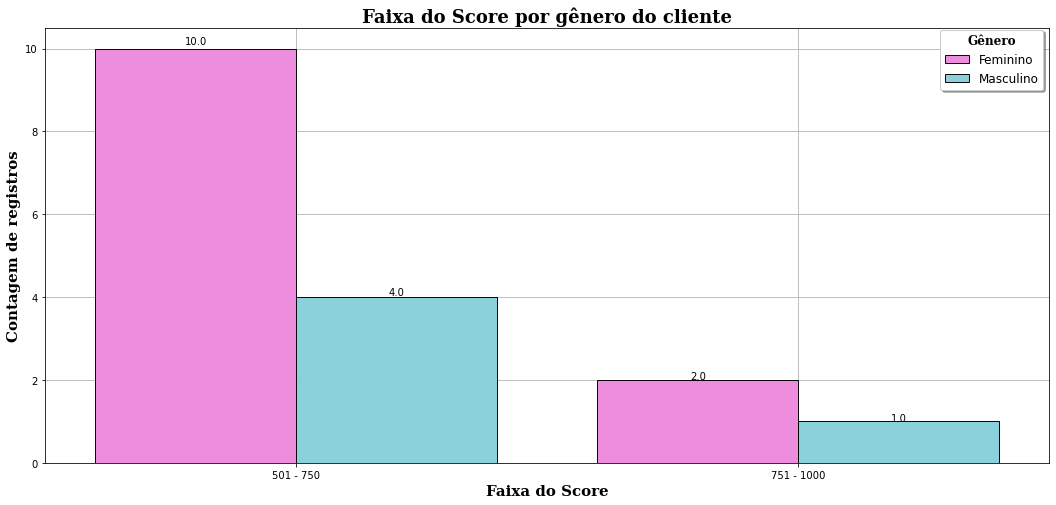

In [107]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df,
    x="SCORE_FAIXA",
    hue="GENERO",
    palette={"FEMININO": "#ff76e7", "MASCULINO": "#77dae7"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa do Score por gênero do cliente",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa do Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Gênero", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Feminino")
L.get_texts()[1].set_text("Masculino")

show_values(ax)

<br>

## Criando uma faixa de Renda

In [108]:
df["RENDA"] = (
    df["RENDA"].str.replace("[A-Za-z]", "").str.replace(",", ".").str.replace(".", "")
)

In [109]:
df["RENDA"] = pd.to_numeric(df["RENDA"])

In [110]:
lista_faixa = []

for i in df["RENDA"]:
    if i <= 120000:
        lista_faixa.append("0 a 1.200,00")

    elif i <= 200000:
        lista_faixa.append("1.201,00 a 2.000,00")

    elif i <= 400000:
        lista_faixa.append("2.001,00 a 4.000,00")

    elif i <= 600000:
        lista_faixa.append("4.001,00 a 6.000,00")

    elif i <= 800000:
        lista_faixa.append("6.001,00 a 8.000,00")

    elif i > 800000:
        lista_faixa.append("Mais de  8.000,00")


df["RENDA_FAIXA"] = lista_faixa

In [111]:
df.head(10)[["RENDA", "RENDA_FAIXA"]]

,RENDA,RENDA_FAIXA
0,99792,"0 a 1.200,00"
1,275599,"2.001,00 a 4.000,00"
2,104485,"0 a 1.200,00"
3,109999,"0 a 1.200,00"
4,109999,"0 a 1.200,00"
5,205984,"2.001,00 a 4.000,00"
6,599989,"4.001,00 a 6.000,00"
7,144996,"1.201,00 a 2.000,00"
8,479988,"4.001,00 a 6.000,00"
9,389991,"2.001,00 a 4.000,00"


<br>

## Faixa da Renda por gênero do cliente

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


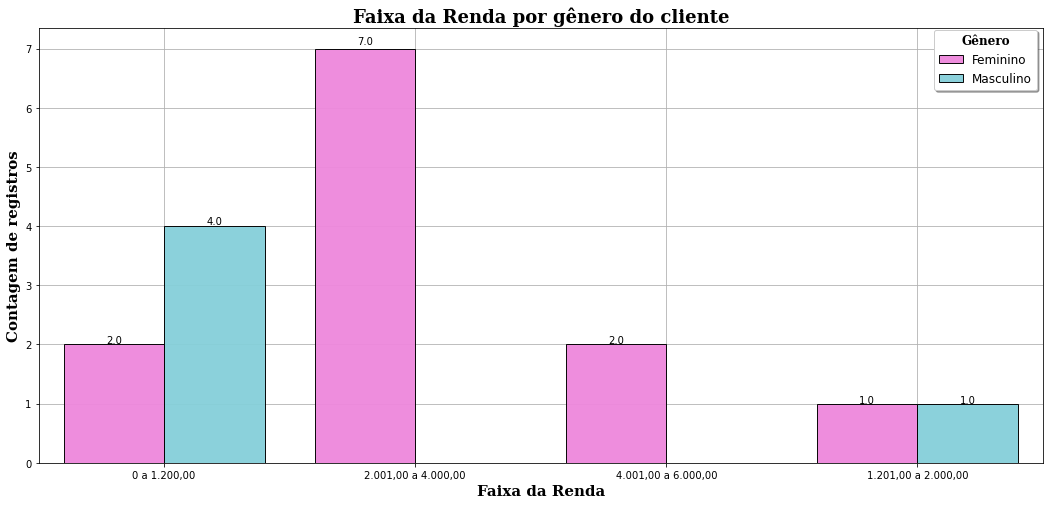

In [112]:
plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df,
    x="RENDA_FAIXA",
    hue="GENERO",
    palette={"FEMININO": "#ff76e7", "MASCULINO": "#77dae7"},
    edgecolor="black",
    linewidth=1,
    alpha=0.95,
    zorder=3,
    # order=result["QTD_ANOS_PRIMEIRO_CONTRATO"],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa da Renda por gênero do cliente",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa da Renda",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Gênero", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Feminino")
L.get_texts()[1].set_text("Masculino")

show_values(ax)

In [113]:
df["RENDA_FAIXA"].value_counts()

2.001,00 a 4.000,00    7
0 a 1.200,00           6
4.001,00 a 6.000,00    2
1.201,00 a 2.000,00    2
Name: RENDA_FAIXA, dtype: int64

<br>

## Faixa da Renda por estado civil do cliente

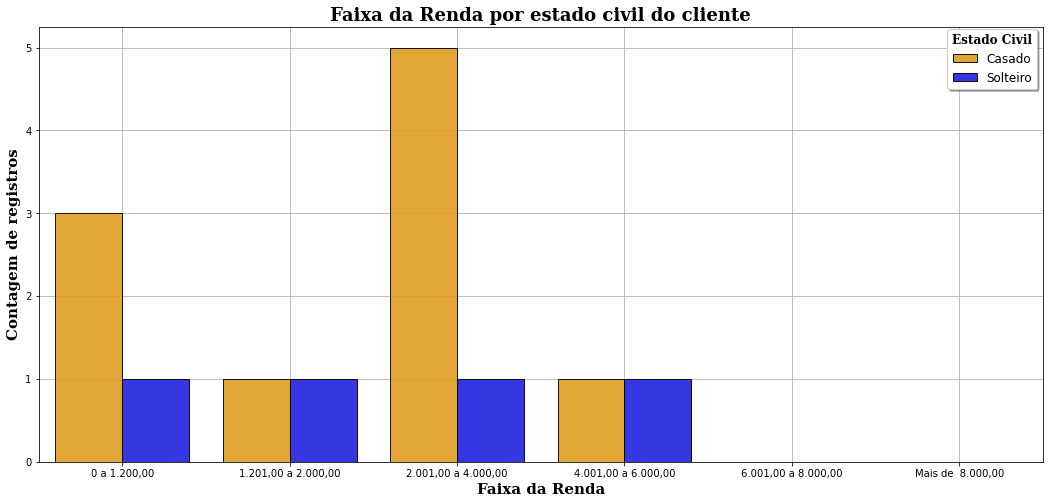

In [114]:
df_filtrado_estado_civil = df[df["ESTADO_CIVIL"] != "Outros"]

plt.figure(figsize=(18, 8))

ax = sns.countplot(
    data=df_filtrado_estado_civil,
    x="RENDA_FAIXA",
    hue="ESTADO_CIVIL",
    palette={
        "Casado": "Orange",
        "Solteiro": "Blue",
        "Divorciado": "Red",
        "Viúvo": "Green",
    },
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    order=[
        "0 a 1.200,00",
        "1.201,00 a 2.000,00",
        "2.001,00 a 4.000,00",
        "4.001,00 a 6.000,00",
        "6.001,00 a 8.000,00",
        "Mais de  8.000,00",
    ],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa da Renda por estado civil do cliente",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa da Renda",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Estado Civil", prop={"size": 12, "family": "serif", "weight": "bold"})
# L.get_texts()[0].set_text("Feminino")
# L.get_texts()[1].set_text("Masculino")

<br>

## Estado civil do cliente por negativação no Serasa

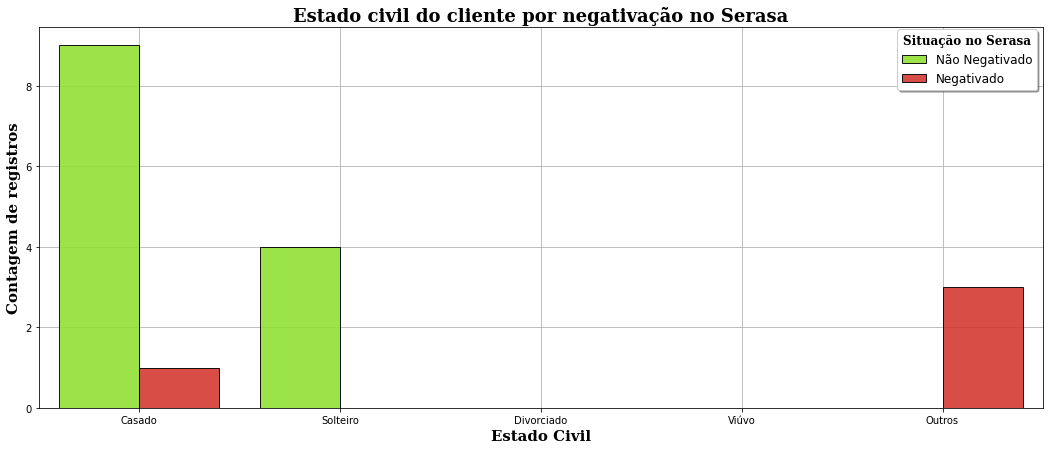

In [115]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df,
    x="ESTADO_CIVIL",
    hue="NEGATIVADO_SERASA_SPC",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    order=["Casado", "Solteiro", "Divorciado", "Viúvo", "Outros"],
)

plt.grid(True, zorder=0)

plt.title(
    "Estado civil do cliente por negativação no Serasa",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Estado Civil",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Situação no Serasa", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não Negativado")
L.get_texts()[1].set_text("Negativado")

<br>

## Estado civil do cliente por atraso de parcela 90 dias +

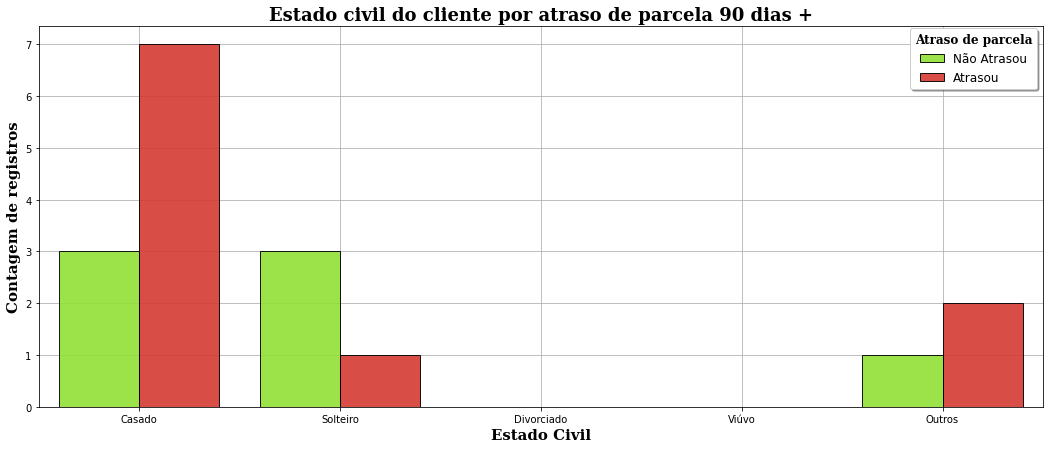

In [116]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df,
    x="ESTADO_CIVIL",
    hue="Ind_atraso_parcela_90dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    order=["Casado", "Solteiro", "Divorciado", "Viúvo", "Outros"],
)

plt.grid(True, zorder=0)

plt.title(
    "Estado civil do cliente por atraso de parcela 90 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Estado Civil",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Atraso de parcela", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não Atrasou")
L.get_texts()[1].set_text("Atrasou")

<br>

## Estado civil do cliente por atraso de parcela 60 dias +

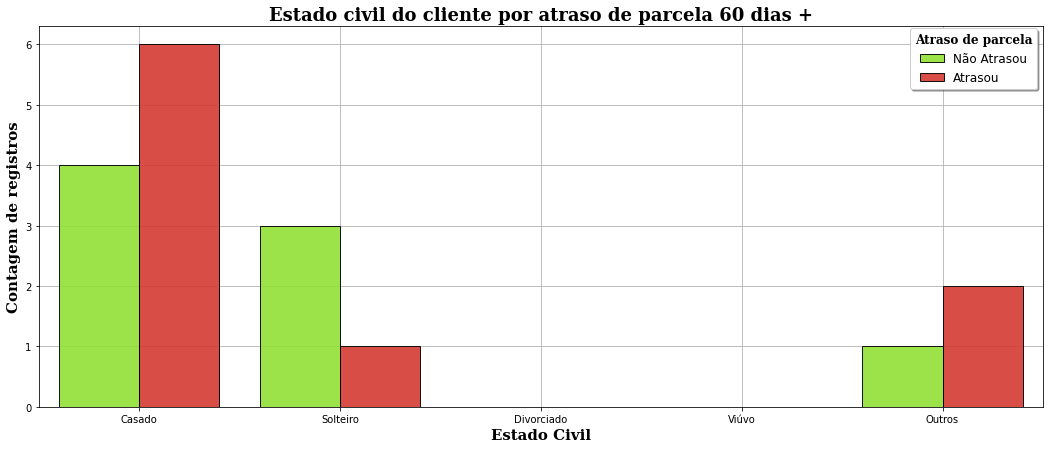

In [117]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df,
    x="ESTADO_CIVIL",
    hue="Ind_atraso_parcela_60dias",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    order=["Casado", "Solteiro", "Divorciado", "Viúvo", "Outros"],
)

plt.grid(True, zorder=0)

plt.title(
    "Estado civil do cliente por atraso de parcela 60 dias +",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Estado Civil",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Atraso de parcela", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não Atrasou")
L.get_texts()[1].set_text("Atrasou")

<br>

## Estado civil do cliente por indicador de renegociação de dívida

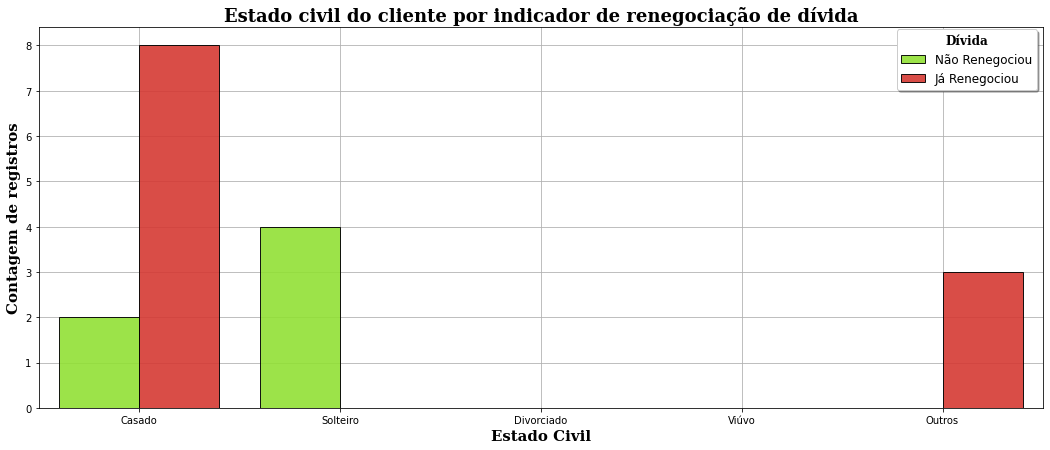

In [118]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df,
    x="ESTADO_CIVIL",
    hue="JA_FEZ_RENEGOCIACAO_DE_DIVIDA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    order=["Casado", "Solteiro", "Divorciado", "Viúvo", "Outros"],
)

plt.grid(True, zorder=0)

plt.title(
    "Estado civil do cliente por indicador de renegociação de dívida",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Estado Civil",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Dívida", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não Renegociou")
L.get_texts()[1].set_text("Já Renegociou")

<br>

## Estado civil do cliente por indicador de processo de cobrança

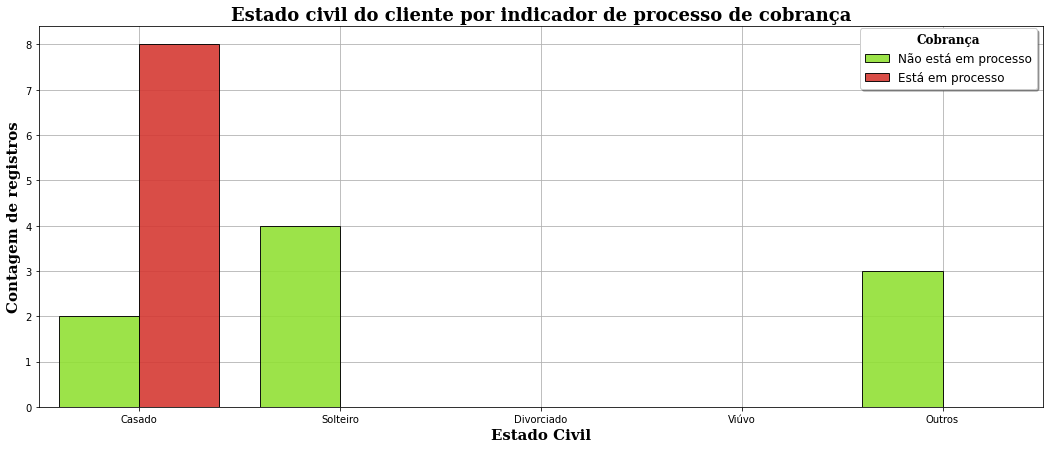

In [119]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df,
    x="ESTADO_CIVIL",
    hue="CLIENTE_EM_PROCESSO_COBRANCA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    order=["Casado", "Solteiro", "Divorciado", "Viúvo", "Outros"],
)

plt.grid(True, zorder=0)

plt.title(
    "Estado civil do cliente por indicador de processo de cobrança",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Estado Civil",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Cobrança", prop={"size": 12, "family": "serif", "weight": "bold"})
L.get_texts()[0].set_text("Não está em processo")
L.get_texts()[1].set_text("Está em processo")

<br>

## Score por Estado civil do cliente (Distribuição estatística)

Text(0, 0.5, 'Score')

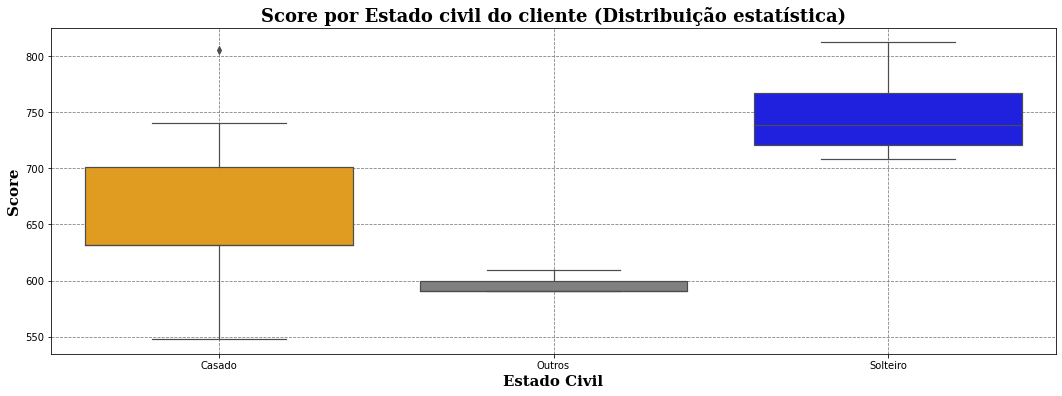

In [120]:
plt.figure(figsize=(18, 6))

ax = sns.boxplot(
    data=df,
    x="ESTADO_CIVIL",
    y="SCORE",
    palette={
        "Casado": "Orange",
        "Solteiro": "Blue",
        "Divorciado": "Red",
        "Viúvo": "Green",
        "Outros": "Grey",
    },
    linewidth=1.2,
    zorder=3,
)

ax.set_axisbelow(True)
ax.grid(color="gray", linestyle="dashed")

plt.title(
    "Score por Estado civil do cliente (Distribuição estatística)",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Estado Civil",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

<br>

## Faixa do Score do cliente por seu estado civil

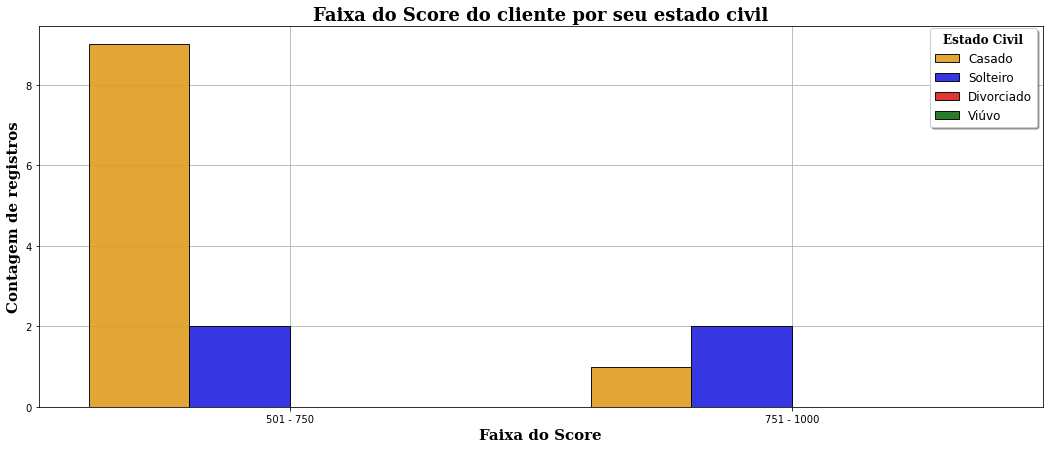

In [121]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df_filtrado_estado_civil,
    x="SCORE_FAIXA",
    hue="ESTADO_CIVIL",
    palette={
        "Casado": "Orange",
        "Solteiro": "Blue",
        "Divorciado": "Red",
        "Viúvo": "Green",
    },
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    hue_order=["Casado", "Solteiro", "Divorciado", "Viúvo"],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa do Score do cliente por seu estado civil",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa do Score",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title("Estado Civil", prop={"size": 12, "family": "serif", "weight": "bold"})

<br>

## Faixa de idade do cliente por valor financiado

In [122]:
# Filtrando os financiamentos (retirando os outliers para a análise ficar mais precisa)
df_vl_filtro = df_filtrado_estado_civil[
    df_filtrado_estado_civil["VL_FINANCIADO"] < 15000
]

Text(0, 0.5, 'Valor Financiado')

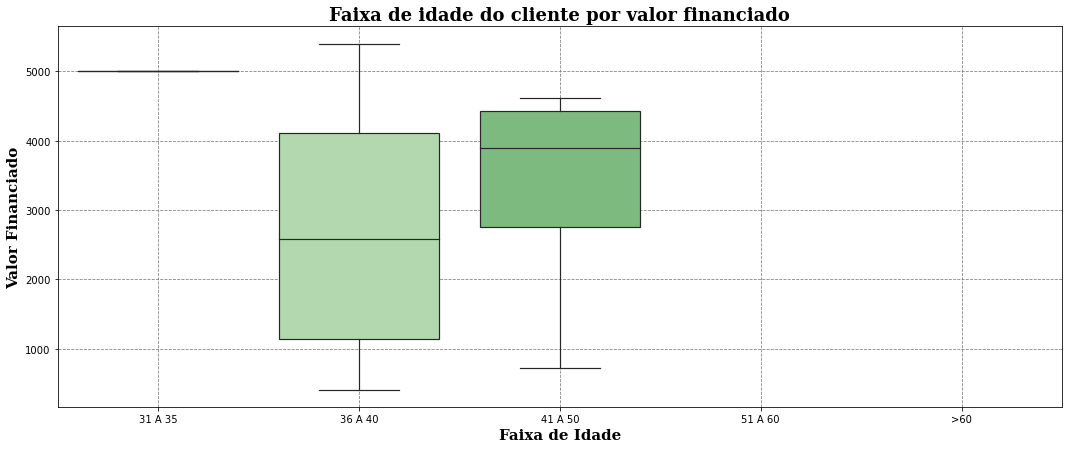

In [123]:
plt.figure(figsize=(18, 7))

ax = sns.boxplot(
    data=df_vl_filtro,
    x="FX_IDADE",
    y="VL_FINANCIADO",
    palette="Greens",
    linewidth=1.2,
    zorder=3,
    order=["31 A 35", "36 A 40", "41 A 50", "51 A 60", ">60"],
)

ax.set_axisbelow(True)
ax.grid(color="gray", linestyle="dashed")

plt.title(
    "Faixa de idade do cliente por valor financiado",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa de Idade",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Valor Financiado",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

# L = plt.legend(
#     loc="upper right",
#     fontsize=12,
#     fancybox=True,
#     shadow=True,
#     bbox_to_anchor=(1, 1.01),
# )
# L.set_title("Estado Civil", prop={"size": 12, "family": "serif", "weight": "bold"})

<br>

## Faixa de idade por cliente em processo de cobrança

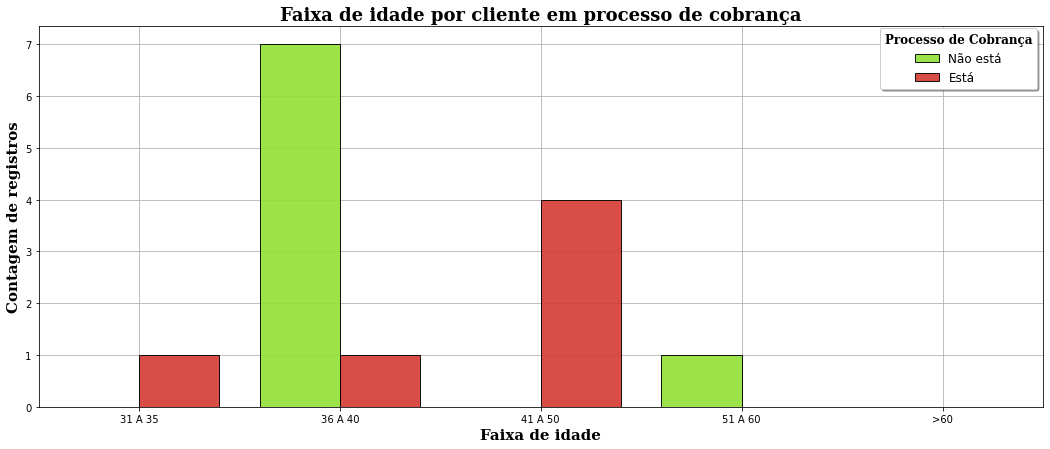

In [124]:
plt.figure(figsize=(18, 7))

ax = sns.countplot(
    data=df,
    x="FX_IDADE",
    hue="CLIENTE_EM_PROCESSO_COBRANCA",
    palette={0: "#93fd18", 1: "#f02018"},
    edgecolor="black",
    linewidth=1,
    alpha=0.9,
    zorder=3,
    order=["31 A 35", "36 A 40", "41 A 50", "51 A 60", ">60"],
)

plt.grid(True, zorder=0)

plt.title(
    "Faixa de idade por cliente em processo de cobrança",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 18},
)
plt.xlabel(
    "Faixa de idade",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)
plt.ylabel(
    "Contagem de registros",
    fontdict={"family": "serif", "color": "black", "weight": "bold", "size": 15},
)

L = plt.legend(
    loc="upper right",
    fontsize=12,
    fancybox=True,
    shadow=True,
    bbox_to_anchor=(1, 1.01),
)
L.set_title(
    "Processo de Cobrança", prop={"size": 12, "family": "serif", "weight": "bold"}
)
L.get_texts()[0].set_text("Não está")
L.get_texts()[1].set_text("Está")

In [125]:
df.head()

,ID_CLI,NO_CONTRATO_CONTA,NM_RAMO_ATIVIDADE,DS_TOP,NO_PLANO,DT_ABERTURA_CONTRATO,VL_FINANCIADO,PE_TAXA_RETENCAO,PE_TAXA_EFETIVA,CD_FORMA_PG_SEGURO,VL_SEGURO,CD_PROPOSTA,TOP,Ind_atraso_parcela_60dias,Ind_atraso_PRIMEIRA_parcela,PRODUTO,CANAL,PUBLICO,OPERACAO,MODALIDADE_PAGTO,QT_CTR_ATIVO,QT_CTR_CANCELADO,QT_CTR_LIQUIDADO,QT_CTR_VENCIDO,CORRENTISTA_BRA,DT_PRIM_CTR_CLIENTE_LOSANGO,TOTAL_VL_FINANCIADO_NEGADO,QT_PROP_TOTAL_NEGADA,MOT_ULTIMA_PROP_NEGADA,Ind_atraso_parcela_90dias,JA_FEZ_RENEGOCIACAO_DE_DIVIDA,NEGATIVADO_SERASA_SPC,SCORE,CLIENTE_EM_PROCESSO_COBRANCA,QTD_ANOS_PRIMEIRO_CONTRATO,SCORE_FAIXA,IN_TIPO_PESSOA,FX_IDADE,GENERO,CEP_RESIDENCIA,CEP_TRABALHO,ESCOLARIDADE,PROFISSAO,ESTADO_CIVIL,RENDA,IN_EMAIL,IN_TELEFONE,RENDA_FAIXA
0,59018857,030200223343556,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,12,2019-12-06,1650.00,0.00,6.20,F,214.19,P2730701919,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,3.00,1.00,NaN,2009-03-14,NaN,NaN,NaN,1,1.00,0,661,1.00,13,501 - 750,F,36 A 40,FEMININO,79490000,79490000.00,Sem resposta,ASSALARIADO COM CART,Casado,99792,S,S,"0 a 1.200,00"
1,68211264,03020099164031L,NAO ENCONTRADA,CREDITO LOJISTA SEM ALIENACAO,12,2019-04-22,1580.21,0.00,5.99,NaN,0.00,P2717851972,1,0,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,5.00,NaN,NaN,2019-04-22,NaN,NaN,NaN,0,1.00,1,609,0.00,2,501 - 750,F,51 A 60,FEMININO,60875776,0.00,Sem resposta,OUTROS,Outros,275599,S,S,"2.001,00 a 4.000,00"
2,8037277,030201255084087,ELETRO EM GERAL,CREDITO PESSOAL,18,2019-07-24,5000.00,0.00,8.79,F,1115.25,P2740850475,5,0,1,EP,FISICO,PF,CARNE,COM JUROS,NaN,NaN,2.00,1.00,1.00,2018-03-14,NaN,NaN,NaN,0,1.00,1,548,1.00,4,501 - 750,F,31 A 35,FEMININO,69980000,69980000.00,Sem resposta,ASSALARIADO COM CART,Casado,104485,S,S,"0 a 1.200,00"
3,23966385,030201255068782,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,6,2019-07-15,901.00,0.00,7.70,F,80.56,P2738493637,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,5.00,NaN,NaN,2019-07-15,NaN,NaN,NaN,1,1.00,1,591,0.00,2,501 - 750,F,36 A 40,MASCULINO,69017058,69088276.00,Sem resposta,TRABALHADOR INFORMAL,Outros,109999,S,S,"0 a 1.200,00"
4,23966385,03020125507037A,MOVEIS,CREDITO LOJISTA SEM ALIENACAO,6,2019-07-15,502.00,0.00,7.70,F,23.87,P2738669296,1,1,0,CDC,FISICO,PF,CARNE,COM JUROS,NaN,NaN,5.00,NaN,NaN,2019-07-15,NaN,NaN,NaN,1,1.00,1,591,0.00,2,501 - 750,F,36 A 40,MASCULINO,69017058,69088276.00,Sem resposta,TRABALHADOR INFORMAL,Outros,109999,S,S,"0 a 1.200,00"
